# Hong Kong News

### Chinese
####  Keywords: COVID-19, 新冠肺炎

* [x] [Sing Tao Daily (星島日報)](https://std.stheadline.com/)
* [x] [Oriental Daily News (東方日報)](https://orientaldaily.on.cc)
* [x] [Ming Pao (明報)](https://www.mingpao.com/)


### English
#### Keywords: COVID-19, coronavirus
* [x] [South China Morning Post’s (SCMP)](https://www.scmp.com/news/hong-kong)
* [x] [Hong Kong Free Press](https://hongkongfp.com/)


In [ ]:
# Only if using Google Collab
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [1]:
PATH = "/drive/My Drive/eugene/coronavirus/hong kong"
PATH = "/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong"

In [1]:
import pandas as pd
import re
import ast
import string
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Scraping

In [ ]:
import urllib.request, urllib.parse
from bs4 import BeautifulSoup
import re
import pandas as pd
import time
import csv
import random
from fake_useragent import UserAgent
import requests
import time
import ast
from datetime import datetime
from time import mktime
from datetime import date
import ast
import json
from os import walk


In [ ]:
ua = UserAgent()
fua = ua.random
headers = {'User-Agent': fua, 'Content-Type': 'text/html; charset=utf-8'}

In [ ]:
from datetime import timedelta, date
def daterange(date1, date2):
# https://www.w3resource.com/python-exercises/date-time-exercise/python-date-time-exercise-50.php
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

## [Sing Tao Daily (星島日報)](https://std.stheadline.com/)

In [ ]:
def getText(url):
    try:
    
    # Returns title, body, date

        req = requests.get(url)
        soup = BeautifulSoup(req.text, 'lxml')

    #     header = soup.find("header", class_="article-md-pl")
    #     if header:
    #         title = header.find("h1").text
    #     date = soup.find("span", class_="date").text    

        body = soup.find("div", class_="paragraphs").text.replace("\n","").replace("\u3000", "").replace("\r", "")
        if body == "":
            body = ' '.join([p.text for p in soup.find("div", class_="paragraphs").findAll("p")])

    #     if "overseas" in url:
    #         body = soup.find("div", class_="paragraphs").text.strip()
    #     else:
    #         body = ' '.join([p.text for p in soup.find("div", class_="paragraphs").findAll("p")])

    #     if body == "":
    #         body = soup.find("div", class_="paragraphs").text.strip()

        body = body.replace("PreviousNext", "").strip()

        return body
    
    except:
        return ""

In [ ]:
# First time calling
url = "https://std.stheadline.com/others/%E5%85%B6%E5%AE%83-%E6%90%9C%E5%B0%8B%E5%8F%8A%E7%B5%90%E6%9E%9C"

startdate = "2020/03/01"
enddate = "2020/03/31"

data = {
    "keyword": "新冠肺炎",
    "section": "all",
    "subsection": "all",
    "sd": f'<font style="vertical-align: inherit;"><font style="vertical-align: inherit;">{startdate}</font></font>',
    "ed": f'<font style="vertical-align: inherit;"><font style="vertical-align: inherit;">{enddate}</font></font>'
}

req = requests.post(url, headers=headers, data=data)
soup = BeautifulSoup(req.text, 'lxml')

In [ ]:
# First time calling
urls = []
titles = []
dates = []
bodies = []

for mb in soup.findAll(class_="media-body"):
    a = mb.find("a")
    link = a["href"]
    title = a["title"]
    date = mb.find(class_="date").text
    body = getText(link)
    
    print(date)

    urls.append(link)
    titles.append(title)
    dates.append(date)
    bodies.append(body)



2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31
2020-03-31


In [ ]:
# Every subsequent time calling

headers = {
    'User-Agent': fua,
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8'
}

startdate = "2020-03-01"
enddate = "2020-03-31"

data = {
    "keyword": "新冠肺炎",
    "section": "all",
    "subsection": "all",
    "sd": f'{startdate}',
    "ed": f'{enddate}'
}

In [ ]:
nextpage = 2


while True:
    print("------PAGE", nextpage)
    url2 = f"https://std.stheadline.com/search/ajax/{nextpage}"
    cookies = req.cookies

    req = requests.post(url2, cookies=cookies, headers=headers, data=data)
    txt = ast.literal_eval(req.text)
    soup = BeautifulSoup(str(txt), 'lxml')
    
    print("len", len(soup.findAll(class_="media-body")))
    
    if len(soup.findAll(class_="media-body")) == 0:
        break

    index = 0
    for mb in soup.findAll(class_="media-body"):
        print(index, date)
        a = mb.find("a")
        link = a["href"].replace("\\\\", "");
        title = a["title"]
        date = mb.find(class_="date").text
        date = re.search("\d\d\d\d-\d\d-\d\d", date).group(0)
        body = getText(link)

        urls.append(link)
        titles.append(title)
        dates.append(date)
        bodies.append(body)
        index += 1
        
    nextpage += 1


------PAGE 3
len 50
0 2020-03-31
1 2020-03-31
2 2020-03-31
3 2020-03-31
4 2020-03-31
5 2020-03-31
6 2020-03-31
7 2020-03-31
8 2020-03-31
9 2020-03-31
10 2020-03-31
11 2020-03-31
12 2020-03-31
13 2020-03-31
14 2020-03-31
15 2020-03-31
16 2020-03-31
17 2020-03-31
18 2020-03-31
19 2020-03-31
20 2020-03-31
21 2020-03-31
22 2020-03-31
23 2020-03-31
24 2020-03-31
25 2020-03-31
26 2020-03-31
27 2020-03-31
28 2020-03-31
29 2020-03-31
30 2020-03-31
31 2020-03-31
32 2020-03-31
33 2020-03-31
34 2020-03-31
35 2020-03-31
36 2020-03-31
37 2020-03-31
38 2020-03-31
39 2020-03-31
40 2020-03-31
41 2020-03-31
42 2020-03-31
43 2020-03-31
44 2020-03-31
45 2020-03-31
46 2020-03-31
47 2020-03-30
48 2020-03-30
49 2020-03-30
------PAGE 4
len 50
0 2020-03-30
1 2020-03-30
2 2020-03-30
3 2020-03-30
4 2020-03-30
5 2020-03-30
6 2020-03-30
7 2020-03-30
8 2020-03-30
9 2020-03-30
10 2020-03-30
11 2020-03-30
12 2020-03-30
13 2020-03-30
14 2020-03-30
15 2020-03-30
16 2020-03-30
17 2020-03-30
18 2020-03-30
19 2020-03-30


In [ ]:
link

'https://std.stheadline.com/realtime/article/1235869/即時-港聞-疫情重挫旅業-房務員兼職保安-自救'

In [ ]:
std = pd.DataFrame.transpose(pd.DataFrame([dates, titles, bodies, urls]))
std.columns = ['date', 'title', 'text', 'url']
std["source"] = "sing tao daily"
std["country"] = "hong kong"
std["keyword"] = "新冠肺炎"

In [ ]:
std

In [ ]:
std.to_csv(f"/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/singtaodaily{startdate}-{enddate}.csv")



In [ ]:
getText(std.loc[30].url)

'                                卑詩大學（UBC）研究人員正加緊測試抗體，希望研製出類似哮喘治療時使用的吸入劑，用於治療新冠病人，或作為預防性措施。 據《溫哥華太陽報》（Vancouver Sun）報道，卑詩大學醫學院傳染病學兼職教授巴赫（Horacio Bach）和他的團隊，現正夜以繼日地測試數百萬種抗體，試圖找到能夠中和且阻止冠狀病毒進入細胞的那種抗體。 研究小組使用細菌作為他們測試的抗體來源。巴赫將這一過程比作在擁有數百萬本藏書的大型圖書館中，查找一本特定的小說，而每一本書就代表一種抗體。他說，沒人知道那本要找的小說在哪裏，研究人員需要對每本書逐一翻看並確認。 小組負責人每天工作18小時 研究小組由巴赫及同樣來自卑詩大學醫學院的斯坦納（Ted Steiner）共同領導。該小組在今年3月由加拿大衛生研究院（Canadian Institutes of Health Research）資助成立，他們的目標之一是開發一種吸入劑，可以將抗體輸送給新冠肺炎患者，以阻斷病毒的擴散。此外，這種吸入劑也可以用作一種預防性藥物。例如在人們出國旅行時，可保障使用者在一段時間內免受病毒侵害。自4月以來，巴赫每天在實驗室工作18小時，平均每天要測試500個毒株。在本月底，他的團隊將進入卑詩大學的一間可測試空氣中病原體的三級實驗室，利用冠狀病毒本身進行測試。研究小組將測試他們在實驗室中培養的抗體，看它們是否起作用。為了讓研究小組成員避免感染冠狀病毒，實驗室將提供負氣壓和個人防護設備，並且需要特別許可才能進入測試區域。 一旦抗體測試有效，研究人員將在小鼠身上展開測試，然後在人體中進行臨床試驗。巴赫說，如果一切順利，吸入劑可能會在明年春天進行臨床試驗。 當被問及吸入劑是否可對重症患者起作用時，巴赫說可能有效，但是仍然有很多未知數。例如，科學家不知道造成病患死亡的原因是否只是病毒，還是由於人體對病毒的反應所引發的嚴重炎症。 巴赫說，在篩查了成千上萬的毒株之後，他們在過去幾周中已取得了進展，希望到本月底可以開始利用在實驗室中培養的細胞來測試病毒感染，之後研究人員需要5天時間觀察結果。星島綜合報道 '

In [ ]:
std.loc[33].url

In [ ]:
req = requests.get(url)
soup = BeautifulSoup(req.text, 'lxml')
header = soup.find("header", class_="article-md-pl")


'柯尊鼎認為港府有責任再推出抗疫基金，以救助健身中心和拳館。PreviousNext(星島日報報道)本地新冠肺炎疫情持續，港府昨宣布再延長健身中心和拳館等的關閉令至下周二。健身搏擊運動業界大聯盟昨公布問卷調查，近七成半業界三個月後可能結業；逾九成要求更多補助。DEF拳館負責人劉志遠則指業界一直自律配合港府，奈何相關政策令人無所適從，業界危機深重。大聯盟早前就業界疫情下的影響做問卷調查，在九百份回應中，有七成半業界的財政狀況只夠營運三個月，過後或出現倒閉潮。調查同時指出截至八月，近半健身中心仍未收到港府十萬元援助金，此外逾九成業界促請推出第三輪防疫基金。大聯盟更指，接獲不少業界反映業主疫下未有減租，召集人柯尊鼎坦言此舉令業界百上加斤：「營運者即使停業仍需交租，即使一直符合防疫措施及未出現感染群組下，仍被一刀切扼殺業界營運空間。港府有責任再推出抗疫基金，按不同場所的租金和員工等發放補償金。」劉志遠則指旗下拳館已收到援助金，但問題不是金額，而是政府政策令業界難看見營運前景：「五月拳館等獲准重開，本拳館的學員總人數一度急升十五巴仙，我們亦花費六位數字港元添置消毒裝置，做好防疫以避免拳館成播毒溫牀。」他續說：「後來疫情第三波爆發，港府要求再次閉館下我們當然願意配合，但其政策卻未能配合拳館運作全停的需要，如本拳館近日漸有學員要求退回課程，全因連他們也看不到重開的機會。敢問前景未明朗下，若有拳館面臨業主續約的要求，負責人還敢動筆嗎？」              '

## [Oriental Daily News (東方日報)](https://orientaldaily.on.cc)


In [ ]:
start_dt = date(2020, 1, 1)
end_dt = date(2020, 8, 12)

date_range = []
for dt in daterange(start_dt, end_dt):
    date_range.append(dt)

In [ ]:
len(date_range)

225

In [ ]:
urls = []
titles = []
dates = []
texts = []

for date in date_range[20:35]:
    print(date)
    url_date = date.strftime("%Y%m%d")
    url = f"https://orientaldaily.on.cc/cnt/news/{url_date}/index.html"
    req = requests.get(url, headers=headers)
    soup = BeautifulSoup(req.text.encode('raw_unicode_escape').decode('utf-8'))
    
    print(len(soup.findAll("a")))
    for a in soup.findAll("a")[14:-12]:
        if a.text:
            link = "https://orientaldaily.on.cc" + a["href"]
            title = a.text

            req2 = requests.get(link, headers=headers)
            soup2 = BeautifulSoup(req2.text.encode('raw_unicode_escape').decode('utf-8'))
            body = ' '.join([p.text for p in soup2.findAll("p")])

            if body and "新冠肺炎" in body or "COVID" in body or "covid" in body or "coronavirus" in body:
                urls.append(link)
                titles.append(title)
                texts.append(body)
                dates.append(date)
    
    if len(titles) > 0:
        print("Saving DF for date", url_date)
        df = pd.DataFrame.transpose(pd.DataFrame([dates, titles, texts, urls]))
        df.columns = ['date', 'title', 'text', 'url']
        df['source'] = 'oriental daily news'
        df['keyword'] = "新冠肺炎"
        df["country"] = "hong kong"
        
        df.to_csv(f"/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/chinese/oriental_{url_date}.csv")

## Ming Pao

In [ ]:
headers['Accept'] = 'application/json, text/javascript, */*; q=0.01'
headers['Accept-Encoding'] = 'gzip, deflate, br'
headers['Accept-Language'] = 'en-US,en;q=0.9,ko-KR;q=0.8,ko;q=0.7,ru-RU;q=0.6,ru;q=0.5,es-US;q=0.4,es;q=0.3'
headers['Connection'] = 'keep-alive'
headers['X-Requested-With'] = 'XMLHttpRequest'
headers['Sec-Fetch-Site'] = 'same-origin'
headers['Sec-Fetch-Mode'] = 'cors'
headers['Sec-Fetch-Des'] = 'empty'
headers['Host'] = "news.mingpao.com"

In [ ]:
start_dt = date(2020, 1, 1)
end_dt = date(2020, 8, 12)

dates = []
for dt in daterange(start_dt, end_dt):
    dates.append(dt.strftime("%Y%m%d"))
    
date_range = []
skip=7
for i in range(0, len(dates)-skip, skip):
    date_range.append((int(dates[i]), int(dates[i+skip])))


In [ ]:
for dr in date_range:
    
    startdate, enddate = dr
    print(f"For dates in range {startdate}-{enddate}")
    
    pagesize = 20
    urls = []
    titles = []
    dates = []
    texts = []

    pagenum = 1
    while True:
#         print(pagenum)
        url = f"https://news.mingpao.com/php/searchapi.php?mode=both&keywords=%25E6%2596%25B0%25E5%2586%25A0%25E8%2582%25BA%25E7%2582%258E%2520&pnssection=s00001%2Cs00002%2Cs00004%2Cs00016%2Cs00003%2Cs00012%2Cs00013%2Cs00014%2Cs00011%2Cs00015%2Cs00005%2Cs00017%2Cs00018&inssection=s00001%2Cs00007%2Cs00002%2Cs00003%2Cs00004%2Cs00005%2Cs00006%2Cs00022&periodstart={startdate}&periodend={enddate}&subsectionkeywords=&sort=d&pagesize={pagesize}&page={pagenum}&searchtype=a"
        req = requests.get(url, headers=headers)

        try:
            articles = ast.literal_eval(req.text.encode('raw_unicode_escape').decode('utf-8'))

        except UnicodeDecodeError:
            articles = ast.literal_eval(req.text)


#         print("len", len(articles['data_Result']))

        if articles['data_Msg'] == "找不到記錄":
            print("None here")
            break

        for i in articles['data_Result']:
            link = urllib.parse.unquote(i['SUMMARY']['sharelink'].replace("\\", ""))
            urls.append(link)
            titles.append(i['TITLE'])
            dates.append(i['PUBDATE'])

            texts.append(i['DESCRIPTION'])

        pagenum += 1

        if len(articles['data_Result']) < 20:
            break
            
    print(len(titles))
    if (len(titles) != 0):
        print("Making dataframe...", len(titles))
    
        df = pd.DataFrame.transpose(pd.DataFrame([titles, dates, texts, urls]))
        df.columns = ['title', 'date', 'text', 'url']
        df['source'] = 'mingpao'
        df['keyword'] = "coronavirus"
        df["country"] = "hong kong"

        df.to_csv(f"/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/chinese/mingpao_{startdate}_{enddate}.csv")
    

    

For dates in range 20200101-20200108
None here
0
For dates in range 20200108-20200115
None here
0
For dates in range 20200115-20200122
None here
0
For dates in range 20200122-20200129
2
Making dataframe... 2
For dates in range 20200129-20200205
7
Making dataframe... 7
For dates in range 20200205-20200212
47
Making dataframe... 47
For dates in range 20200212-20200219
118
Making dataframe... 118
For dates in range 20200219-20200226
150
Making dataframe... 150
For dates in range 20200226-20200304
242
Making dataframe... 242
For dates in range 20200304-20200311
656
Making dataframe... 656
For dates in range 20200311-20200318
809
Making dataframe... 809
For dates in range 20200318-20200325
823
Making dataframe... 823
For dates in range 20200325-20200401
884
Making dataframe... 884
For dates in range 20200401-20200408
833
Making dataframe... 833
For dates in range 20200408-20200415
754
Making dataframe... 754
For dates in range 20200415-20200422
726
Making dataframe... 726
For dates in range

In [ ]:
articles

{'data_Msg': '找不到記錄'}

In [ ]:
urls = []
titles = []
dates = []
texts = []

index = 0
for i in articles['data_Result'][0:12]:
    print(index)
    
    index += 1

    link = urllib.parse.unquote(i['SUMMARY']['sharelink'].replace("\\", ""))
    urls.append(link)
    titles.append(i['TITLE'])
    dates.append(i['PUBDATE'])
    
    texts.append(i['DESCRIPTION'])
    
#     req2 = requests.get(link, headers=headers)
#     soup = BeautifulSoup(req2.text)
#     text = ' '.join([p.text for p in soup.findAll("p")]).strip()
#     text = text.replace("\n", "")
    
#     try:
#         text = text.encode('raw_unicode_escape').decode('utf8')
#         texts.append(text)
        
#     except (UnicodeEncodeError, UnicodeDecodeError) as e: 
#         print(e)
#         texts.append(text)
#         continue

## Hong Kong Free Press

In [ ]:
url = "https://hongkongfp.com/?s=coronavirus"
url = "https://hongkongfp.com/page/2/?s=coronavirus"
url = "https://hongkongfp.com/2020/05/01/?s=coronavirus"

In [ ]:

        
dates_iter = []
start_dt = date(2020, 1, 1)
end_dt = date(2020, 8, 12)
for dt in daterange(start_dt, end_dt):
    dates_iter.append(dt)


In [ ]:
# urls = []
# titles = []
# dates = []

for dt in dates_iter[218:]:
    print(dt)
    url = f"https://hongkongfp.com/2020/{dt.month}/{dt.day}/?s=coronavirus"
    req = requests.get(url)
    soup = BeautifulSoup(req.text)
    
    for a in soup.findAll(class_="entry-container"):
        linky = a.find("h2").find("a")
        link = linky["href"]
        title = linky.text
        
        date = a.find("time")["datetime"]
        
        urls.append(link)
        titles.append(title)
        dates.append(date)

        print(date, title)

In [ ]:
df = pd.DataFrame.transpose(pd.DataFrame([titles, dates, urls]))
df.columns = ['title', 'date', 'url']
df['source'] = 'hong kong fp'
df['keyword'] = "coronavirus"
df["country"] = "hong kong"

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)


In [ ]:
for index, row in df.iterrows():
    print(index)
    req = requests.get(row.url)
    soup = BeautifulSoup(req.text)
    
    ps = soup.find("div", class_="entry-content")
    text = ' '.join([p.text for p in ps.findAll("p")])
    df.loc[index, 'text'] = text


In [ ]:
df.to_csv("/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/english/hongkongfp.csv")

## SCMP

### If this worked, would be great

In [ ]:
headers["apikey"] = "MyYvyg8M9RTaevVlcIRhN5yRIqqVssNY"

In [ ]:
unix_date = unix_dates[0]
limit = 10
url = f"https://apigw.scmp.com/search/v1?q={search}+more:pagemap:metatags-cse_type:Article&offset={offset}&limit={limit}%26variables%3D%7B%22after%22%3A%22{unix_date}%22%7D"    
req = requests.get(url, headers=headers)
print(len(req.json()["items"]))


10


In [ ]:
search = "coronavirus"
limit = 10

# titles = []
# dates = []
# urls = []

for offset in range(1,92,10):
    print(offset)
    url = f"https://apigw.scmp.com/search/v1?q={search}+more:pagemap:metatags-cse_type:Article&offset={offset}&limit={limit}"    
    req = requests.get(url, headers=headers)
    print(len(req.json()["items"]))
    
    for i in req.json()["items"]:
        title = i["title"]
        if "publishdate" in i:
            date = i["publishdate"]
        else: date = ""
        link = i["url"]
        
        titles.append(title)
        dates.append(date)
        urls.append(link)


1
10
11
10
21
10
31
10
41
10
51
10
61
10
71
10
81
10
91
10


### Instead, scraping from "coronavirus" section

In [ ]:
from datetime import timedelta, date

In [ ]:
def daterange(date1, date2):
# https://www.w3resource.com/python-exercises/date-time-exercise/python-date-time-exercise-50.php
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

In [ ]:
unix_dates = []
start_dt = date(2020, 1, 1)
end_dt = date(2020, 8, 12)
for dt in daterange(start_dt, end_dt):
    unix_dates.append(int(time.mktime(dt.timetuple()) * 1000))


In [ ]:
len(unix_dates), len(unix_dates[::2])

(225, 113)

In [ ]:
titles = []
urls = []
limit = 30
index = 0
for unix_time in unix_dates:
    print(index)
    url = f"https://apigw.scmp.com/content-delivery/v1?operationName=gettopicbyentityuuid&avariables=%7B%22latestContentsLimit%22%3A{limit}%2C%22latestOpinionsLimit%22%3A{limit}%2C%22entityUuid%22%3A%22014e94b1-7f09-46a4-9d18-9eb80f3d4ae2%22%2C%22articleTypeId%22%3A%22012d7708-2959-4b2b-9031-23e3d025a08d%22%2C%22applicationIds%22%3A%5B%222695b2c9-96ef-4fe4-96f8-ba20d0a020b3%22%5D%2C%22after%22%3A%22{unix_time}%22%7D&extensions=%7B%22persistedQuery%22%3A%7B%22version%22%3A1%2C%22sha256Hash%22%3A%22a78c49ca1280c93d31533f172e1a837d7e8aebf1215195364cb7fd85c76d2e0e%22%7D%7D"
    req = requests.get(url, headers=headers)
    if "data" in req.json():
        for i in req.json()["data"]["topic"]["latestContentsWithCursor"]["items"]:
            titles.append(i['headline'])
            urls.append("https://www.scmp.com" + i['urlAlias'])
        for i in req.json()["data"]["topic"]["latestOpinions"]:
            titles.append(i['headline'])
            urls.append("https://www.scmp.com" + i['urlAlias'])
        index+=1


In [ ]:
df = pd.DataFrame.transpose(pd.DataFrame([titles, urls]))
df.columns = ['title', 'url']
df['source'] = 'scmp'
df['keyword'] = "coronavirus"
df["country"] = "hong kong"

In [ ]:
len(df.drop_duplicates()), len(df)

(5749, 13414)

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)


In [ ]:
for index, row in df[3010:].iterrows():
    
    try:
        if "video" in row.url:
            
            continue
        req = requests.get(row.url, headers=headers)
        soup = BeautifulSoup(req.text)

        date = soup.find("time")["datetime"]

        rawtext = re.findall('"type":"p","children":\[{"type":"text","data":"(.*?)"', req.text)
        idx = [idx for idx, element in enumerate(rawtext) if "Reporter, " in element]
        if not idx:
            text = ' '.join(rawtext)
        else:
            text = ' '.join(rawtext[:idx[0]])

        print(index, date)

        df.loc[index, 'date'] = pd.to_datetime(date)
        df.loc[index, 'text'] = text
    except:
        continue


3011 2020-04-30T23:45:06.000Z
3012 2020-04-30T23:24:05.000Z
3013 2020-04-30T23:15:20.000Z
3014 2020-04-30T23:15:16.000Z
3015 2020-04-30T23:08:58.000Z
3016 2020-04-30T23:00:25.000Z
3017 2020-04-30T23:00:22.000Z
3018 2020-04-30T23:00:19.000Z
3019 2020-04-30T23:00:15.000Z
3020 2020-04-30T22:00:18.000Z
3021 2020-04-30T21:00:16.000Z
3022 2020-04-30T20:53:49.000Z
3023 2020-04-30T19:55:18.000Z
3024 2020-04-30T19:31:08.000Z
3025 2020-04-30T19:06:49.000Z
3026 2020-04-30T18:22:36.000Z
3027 2020-04-30T18:00:11.000Z
3028 2020-04-30T16:05:12.000Z
3029 2020-04-30T15:54:29.000Z
3030 2020-05-02T04:24:44.000Z
3031 2020-05-02T04:14:16.000Z
3032 2020-05-02T04:00:26.000Z
3033 2020-05-02T04:00:19.000Z
3034 2020-05-02T02:45:08.000Z
3035 2020-05-02T02:15:23.000Z
3036 2020-05-02T02:00:18.000Z
3037 2020-05-02T00:00:22.000Z
3038 2020-05-02T00:00:19.000Z
3039 2020-05-02T00:00:13.000Z
3040 2020-05-01T23:45:16.000Z
3041 2020-05-01T23:25:11.000Z
3042 2020-05-01T23:15:14.000Z
3043 2020-05-01T23:00:06.000Z
3044 2020-

In [ ]:
scmp = df[df.date.notna()]

In [ ]:
scmp.reset_index(inplace=True, drop=True)

In [ ]:
scmp

,title,url,source,keyword,country,date,text
0,Hong Kong takes emergency measures as mystery ...,https://www.scmp.com/news/china/politics/artic...,scmp,coronavirus,hong kong,2019-12-31 06:35:29+00:00,Most cases have originated from a single seafo...
1,Coronavirus: Thai king criticised for staying ...,https://www.scmp.com/magazines/style/celebrity...,scmp,coronavirus,hong kong,2019-09-29 06:00:11+00:00,Sheikhs from the oil-rich Middle East have had...
2,Why a struggling Japan may have no choice but ...,https://www.scmp.com/comment/opinion/article/3...,scmp,coronavirus,hong kong,2020-08-12 01:45:13+00:00,Tokyo can do little about US dollar weakness a...
3,As Everest prepares to reopen for autumn climb...,https://www.scmp.com/magazines/post-magazine/t...,scmp,coronavirus,hong kong,2020-08-12 00:45:16+00:00,"Not for the first time, the tourism-dependent ..."
4,How Covid-19 is proving a boon for criminal ne...,https://www.scmp.com/comment/opinion/article/3...,scmp,coronavirus,hong kong,2020-08-11 19:30:12+00:00,As the pandemic forces more people to go onlin...
...,...,...,...,...,...,...,...
5509,PFL chief ‘certain’ coronavirus won’t scratch ...,https://www.scmp.com/sport/martial-arts/mixed-...,scmp,coronavirus,hong kong,2020-08-05 12:58:59+00:00,Professional Fighters League CEO Peter Murray ...
5510,Coronavirus recovery: gold price spike shows r...,https://www.scmp.com/business/article/3095853/...,scmp,coronavirus,hong kong,2020-08-04 09:00:05+00:00,No doubt the uncertainty surrounding the pande...
5511,Coronavirus: China positions itself for ‘vacci...,https://www.scmp.com/news/china/science/articl...,scmp,coronavirus,hong kong,2020-08-04 05:36:23+00:00,Beijing is offering loans and priority access ...
5512,Donald Trump is a bigger threat to the US than...,https://www.scmp.com/comment/opinion/article/3...,scmp,coronavirus,hong kong,2020-08-03 19:30:08+00:00,His retweeting of dubious claims about an unpr...


In [ ]:
scmp.to_csv("/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/english/scmp.csv")

## Merging

In [ ]:
ch_files = []
ch_path = "/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/chinese/"
for (dirpath, dirnames, filenames) in walk(ch_path):
    ch_files.extend(filenames)

ch_files = [a for a in ch_files if "csv" in a]

In [ ]:
df_ch = pd.concat([pd.read_csv(ch_path + a) for a in ch_files])
df_ch.drop(columns="Unnamed: 0", inplace=True)
df_ch.drop_duplicates(inplace=True)
df_ch['date'] = pd.to_datetime(df_ch['date'])
df_ch.sort_values(by="date", inplace=True)
df_ch.reset_index(inplace=True, drop=True)

In [ ]:
df_ch

,date,title,text,url,source,keyword,country
0,2020-01-24 00:00:00,【武漢肺炎】黑龍江出現新型冠狀病毒肺炎死亡個案,黑龍江累計新冠肺炎確診病例4宗，死亡病例1宗。黑龍江省報告新型冠狀病毒感染的肺炎新增確診病例...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong
1,2020-01-24 00:00:00,【武漢肺炎】發熱咳嗽非唯一首發症狀 腹瀉、頭痛、肌肉酸痛都有可能！,無發燒、咳嗽都有可能感染新型冠狀病毒！武漢大學人民醫院周五（24日）發佈新冠肺炎患者識別「升...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong
2,2020-01-24 13:28:30,【武漢肺炎】小米捐逾30萬元醫療物資 融創中國捐千萬元 助武漢抗疫,武漢肺炎疫情嚴峻。內地傳媒報道，小米（1810）啟動緊急援助武漢行動，向當地捐贈首批逾30萬...,https://news.mingpao.com/ins/經濟/article/202001...,mingpao,coronavirus,hong kong
3,2020-01-27 00:00:00,湖北省長記者會市長口罩戴反還鼓掌 網民轟「慘不忍睹」,Your browser does not support the video tag. ...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong
4,2020-01-28 00:00:00,武漢市長願革職謝罪,（星島日報報道）湖北省前晚召開新型肺炎疫情防控工作新聞發布會，省長王曉東、武漢市長周先旺、省...,https://std.stheadline.com/daily/article/21391...,sing tao daily,新冠肺炎,hong kong
...,...,...,...,...,...,...,...
28471,2020-08-12 21:44:51,佳兆業健康盈警 上半年料蝕600至1000萬,佳兆業健康（0876）發布盈警，預期今年上半年錄得虧損600萬至1000萬元，相對去年同期純...,https://news.mingpao.com/ins/經濟/article/202008...,mingpao,coronavirus,hong kong
28472,2020-08-12 22:00:03,新冠肺炎｜韓國4月至今44外國人違隔離令被驅逐出境,韓聯社引述法務部消息報道，當地政府自4月至今把44名違反新型冠狀病毒疫情下隔離規定的外國人驅...,https://news.mingpao.com/ins/國際/article/202008...,mingpao,coronavirus,hong kong
28473,2020-08-12 22:18:21,歐聯︱PSG麥巴比料後備 伊卡迪疑有傷 阿特蘭大中場若奪標派千份薄餅,歐聯8強周四凌晨（13日）展開，打頭陣的巴黎聖日耳門（PSG），陣前確認前鋒基利安麥巴比傷癒...,https://news.mingpao.com/ins/體育/article/202008...,mingpao,coronavirus,hong kong
28474,2020-08-12 22:20:45,新冠肺炎｜入檢疫中心滿10日可回家完成餘下4日檢疫 安排今起重新實施,衛生防護中心要求新型冠狀病毒確診者的密切接觸者，以及從部分海外國家及地區抵港的人，入住檢疫中...,https://news.mingpao.com/ins/港聞/article/202008...,mingpao,coronavirus,hong kong


In [ ]:
df_ch.drop_duplicates("text").groupby("source")['title'].count()

source
mingpao                10159
oriental daily news     4067
sing tao daily         13691
Name: title, dtype: int64

In [ ]:
df_ch.to_csv("/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/raw_chinese.csv")

In [ ]:
df_ch = pd.read_csv("/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/raw_chinese.csv")

In [ ]:
df_ch[df_ch.date < "2020-06-24"]

,Unnamed: 0,date,title,text,url,source,keyword,country
0,0,2020-01-24 00:00:00,【武漢肺炎】黑龍江出現新型冠狀病毒肺炎死亡個案,黑龍江累計新冠肺炎確診病例4宗，死亡病例1宗。黑龍江省報告新型冠狀病毒感染的肺炎新增確診病例...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong
1,1,2020-01-24 00:00:00,【武漢肺炎】發熱咳嗽非唯一首發症狀 腹瀉、頭痛、肌肉酸痛都有可能！,無發燒、咳嗽都有可能感染新型冠狀病毒！武漢大學人民醫院周五（24日）發佈新冠肺炎患者識別「升...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong
2,2,2020-01-24 13:28:30,【武漢肺炎】小米捐逾30萬元醫療物資 融創中國捐千萬元 助武漢抗疫,武漢肺炎疫情嚴峻。內地傳媒報道，小米（1810）啟動緊急援助武漢行動，向當地捐贈首批逾30萬...,https://news.mingpao.com/ins/經濟/article/202001...,mingpao,coronavirus,hong kong
3,3,2020-01-27 00:00:00,湖北省長記者會市長口罩戴反還鼓掌 網民轟「慘不忍睹」,Your browser does not support the video tag. ...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong
4,4,2020-01-28 00:00:00,武漢市長願革職謝罪,（星島日報報道）湖北省前晚召開新型肺炎疫情防控工作新聞發布會，省長王曉東、武漢市長周先旺、省...,https://std.stheadline.com/daily/article/21391...,sing tao daily,新冠肺炎,hong kong
...,...,...,...,...,...,...,...,...
22595,22595,2020-06-23 20:41:32,【新冠肺炎】佐高域與太太確診 慈善賽變爆疫群組 稱主辦賽事出於善意,世界一哥佐高域主辦亞德里亞慈善巡迴賽，戰至第2站卻演變成爆疫群組，他今晚（23日）更證實與太...,https://news.mingpao.com/ins/體育/article/202006...,mingpao,coronavirus,hong kong
22596,22596,2020-06-23 21:30:42,屈臣氏月產1000萬個WatsMask WeCare口罩 月底推ASTM Level 3口罩,香港品質保證局自3月底啟動「醫用防護口罩產品認證計劃」，今日（23日）發出首個認證予屈臣氏蒸...,https://news.mingpao.com/ins/港聞/article/202006...,mingpao,coronavirus,hong kong
22597,22597,2020-06-23 22:19:47,AEON信貸財務上季少賺29.52%,AEON信貸財務（0900）發表今年5月底止季度業績，受新冠肺炎疫情影響，使其私人貸款、信用...,https://news.mingpao.com/ins/經濟/article/202006...,mingpao,coronavirus,hong kong
22598,22598,2020-06-23 22:58:13,瑞幸再收除牌通知 股價再跌15%,在美國上市的瑞幸咖啡在今日表示，再收到納斯達克於的正式通知指會將該公司除牌。瑞幸指出，該通知...,https://news.mingpao.com/ins/經濟/article/202006...,mingpao,coronavirus,hong kong


In [ ]:
eng_files = []
eng_path = "/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/english/"
for (dirpath, dirnames, filenames) in walk(eng_path):
    eng_files.extend(filenames)

eng_files = [a for a in eng_files if "csv" in a]

In [ ]:
df_eng = pd.concat([pd.read_csv(eng_path + a) for a in eng_files])
df_eng.reset_index(inplace=True, drop=True)
df_eng.drop(columns="Unnamed: 0", inplace=True)
df_eng['date'] = pd.to_datetime(df_eng['date'], utc=True)
df_eng.sort_values(by="date", inplace=True)
df_eng.reset_index(inplace=True, drop=True)


In [ ]:
df_eng

,title,date,url,source,keyword,country,text
0,Coronavirus: Thai king criticised for staying ...,2019-09-29 06:00:11+00:00,https://www.scmp.com/magazines/style/celebrity...,scmp,coronavirus,hong kong,Sheikhs from the oil-rich Middle East have had...
1,Hong Kong takes emergency measures as mystery ...,2019-12-31 06:35:29+00:00,https://www.scmp.com/news/china/politics/artic...,scmp,coronavirus,hong kong,Most cases have originated from a single seafo...
2,World Health Organisation in touch with Beijin...,2020-01-01 08:59:49+00:00,https://www.scmp.com/news/china/politics/artic...,scmp,coronavirus,hong kong,Authorities in central city of Wuhan say marke...
3,Hong Kong woman hospitalised and quarantined a...,2020-01-02 04:34:54+00:00,https://www.scmp.com/news/hong-kong/health-env...,scmp,coronavirus,hong kong,Patient admitted to Tuen Mun Hospital displayi...
4,Wuhan pneumonia: Hong Kong patients who visite...,2020-01-02 13:30:24+00:00,https://www.scmp.com/news/china/society/articl...,scmp,coronavirus,hong kong,City’s health authorities unveil raft of preve...
...,...,...,...,...,...,...,...
6135,Coronavirus: South Korea hit with resurgence o...,2020-08-12 09:01:32+00:00,https://www.scmp.com/week-asia/health-environm...,scmp,coronavirus,hong kong,The country recorded a daily tally of 50-plus ...
6136,Coronavirus: China eases travel restrictions f...,2020-08-12 10:01:48+00:00,https://www.scmp.com/news/china/diplomacy/arti...,scmp,coronavirus,hong kong,"Passport holders from 36 countries, including ..."
6137,Nations brace for new coronavirus outbreaks as...,2020-08-12 10:23:06+00:00,https://www.scmp.com/news/world/united-states-...,scmp,coronavirus,hong kong,The world is expected to surge past the grim l...
6138,China’s exports to show ‘remarkable’ rise desp...,2020-08-12 11:30:16+00:00,https://www.scmp.com/economy/china-economy/art...,scmp,coronavirus,hong kong,Customs Minister Ni Yuefeng says China’s globa...


In [ ]:
df_eng.groupby("source")['title'].count()

source
hong kong fp     626
scmp            5514
Name: title, dtype: int64

In [ ]:
df_eng.to_csv("/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/raw_english.csv")

In [ ]:
df_eng = pd.read_csv("/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/raw_english.csv")

In [ ]:

df_eng[df_eng.date < "2020-06-24"]

,Unnamed: 0,title,date,url,source,keyword,country,text
0,0,Coronavirus: Thai king criticised for staying ...,2019-09-29 06:00:11+00:00,https://www.scmp.com/magazines/style/celebrity...,scmp,coronavirus,hong kong,Sheikhs from the oil-rich Middle East have had...
1,1,Hong Kong takes emergency measures as mystery ...,2019-12-31 06:35:29+00:00,https://www.scmp.com/news/china/politics/artic...,scmp,coronavirus,hong kong,Most cases have originated from a single seafo...
2,2,World Health Organisation in touch with Beijin...,2020-01-01 08:59:49+00:00,https://www.scmp.com/news/china/politics/artic...,scmp,coronavirus,hong kong,Authorities in central city of Wuhan say marke...
3,3,Hong Kong woman hospitalised and quarantined a...,2020-01-02 04:34:54+00:00,https://www.scmp.com/news/hong-kong/health-env...,scmp,coronavirus,hong kong,Patient admitted to Tuen Mun Hospital displayi...
4,4,Wuhan pneumonia: Hong Kong patients who visite...,2020-01-02 13:30:24+00:00,https://www.scmp.com/news/china/society/articl...,scmp,coronavirus,hong kong,City’s health authorities unveil raft of preve...
...,...,...,...,...,...,...,...,...
4851,4851,Coronavirus expert Anthony Fauci says Donald T...,2020-06-23 17:38:30+00:00,https://www.scmp.com/news/world/united-states-...,scmp,coronavirus,hong kong,Top health official tells Congress that focus ...
4852,4852,"US out, China in as EU looks to reopen externa...",2020-06-23 19:10:29+00:00,https://www.scmp.com/news/world/europe/article...,scmp,coronavirus,hong kong,Brussels wants to restart limited global trave...
4853,4853,Fashion after the coronavirus: no fashion week...,2020-06-23 21:00:12+00:00,https://www.scmp.com/lifestyle/fashion-beauty/...,scmp,coronavirus,hong kong,As Chinese former investment banker Ada Yi Zha...
4854,4854,Can Xi Jinping revive China’s dream of turning...,2020-06-23 22:14:28+00:00,https://www.scmp.com/economy/china-economy/art...,scmp,coronavirus,hong kong,Beijing’s new Go West blueprint is an ambitiou...


# Chinese

In [4]:
import jieba
import nltk

In [5]:
def tokenize(line):
    words = jieba.cut(line, cut_all=False)
    words = [str(word) for word in words if not str(word) in jieba_stop_words]
    words = [word for word in words if word != ' '] # get rid of empty spaces
    combined = ' '.join(words)
    # print(words)
    combined = combined.replace('接觸 追 蹤', '接觸 追蹤')
    combined = combined.replace("接觸 者 追 蹤", "接觸者 追蹤")
    combined = combined.replace("追 蹤 接 觸 者", "追蹤 接觸者")
    combined = combined.replace("流行病 學調 查及 接觸 者 追 蹤 的 工作",
                                "流行病學 調查 及 接觸者 追蹤 的 工作")
    combined = combined.replace("流行病 學調查",
                                "流行病學 調查")
    combined = re.sub(r'\d', '', combined) # Remove numbers

    return combined

In [6]:
list(jieba.tokenize("流行病學調查"))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/z7/j6g_nx0167b2hk9ywm4kgrcr0000gn/T/jieba.cache
Loading model cost 0.921 seconds.
Prefix dict has been built successfully.


[('流行病', 0, 3), ('學調查', 3, 6)]

In [7]:
def list_flatten(l, a=None):
    #check a
    if a is None:
        #initialize with empty list
        a = []

    for i in l:
        if isinstance(i, list):
            list_flatten(i, a)
        else:
            if (len(i) != 1): a.append(i)
    return a

In [8]:
def find_top_frequent_words(documents, top_n):
    dist = nltk.FreqDist(documents)
    top_frequent = []
    for keys in dist.most_common(top_n):
#         print(keys)
        a,b = keys
        top_frequent.append(keys)
    return top_frequent

In [9]:
# Capture from https://github.com/fxsjy/jieba/blob/master/extra_dict/stop_words.txt
jieba_stop_words = [
    '的', '了', '和', '是', '就', '都', '而', '及', '與', 
    '著', '或', '一個', '沒有', '我們', '你們', '妳們', 
    '他們', '她們', '是否', '', ' '
    '另外', '不過', '已經', '雖然','如果','因此', '同時','至於', # last two lines added manually
    '這些','仍然','非常','此外','所以','如果','這是']

### Preliminary Cleaning


In [ ]:
def cleanhtml(raw_html):
    # https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [ ]:
def clean_text(text):
    remove_char = string.punctuation + '…' + '\xa0' + '·' + '\n' + \
        '※' + '‘' + '’' + '\'' + '▲' + '∼' + "△" + "“" + "”" + "▶" + "․" + \
        "▸" + '\u3000' + '「' + '」' + '。' + '▪' + '【' + '】' + '，' + '、' + '％' + \
        "）" + "（" + "；" + "○" + '，' + '：' + "'" + "！" + "《" + "》" + \
        "『" + "』"
    text = cleanhtml(text) # Remove html
    text = re.sub('http[s]?://\S+', '', text) # Remove http urls
    text = re.sub('(www\.)((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', text) # Remove www.
    text = re.sub(r'Chrome|Firefox|Microsoft Edge', '', text) # Remove english words related to browser
    text = re.sub(r'Your browser does not support the video tag.', '', text) # Remove specific text
    text = re.sub(r'APP', '', text) # Remove specfiic text
    text = re.sub('\S*@\S*\s?', '', text) # Remove emails
    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
    text = re.sub(r'[%s]' % re.escape(remove_char), '', text) # Remove punctuation
    text = re.sub(r'&nbsp;', '', text) # Remove this character
    text = re.sub(r'\xa0', '', text) # Remove this character
    text = re.sub(r'\n', '', text) # Remove newlines
    text = re.sub(r':cosplay', '', text) # Remove text
    text = re.sub(r'\s+', ' ', text) # Replace many spaces with one
    # text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers
    text = re.sub('\'', '', text)
    text = re.sub(r'Copyright .* rights reserved', '', text) # Remove "Copyright all rights reserved"
    return text


In [ ]:
df = pd.read_csv(f"{PATH}/data/raw_chinese.csv")
df = df[df.date < "2020-06-24"]
df.drop(columns = "Unnamed: 0", inplace=True)
df = df[~df['text'].isnull()]

In [ ]:
df['text_clean'] = pd.DataFrame(df.text.apply(lambda x: clean_text(x)))

In [ ]:
list(df[0:10].text)

['黑龍江累計新冠肺炎確診病例4宗，死亡病例1宗。黑龍江省報告新型冠狀病毒感染的肺炎新增確診病例2宗，死亡病例1宗。其中綏化市為報告首例確診病例，大慶市為報告首例確診病例。截至昨天（23日）晚12時，黑龍江省累計報告新型冠狀病毒感染的肺炎確診病例4宗，其中：哈爾濱市1宗、牡丹江市1宗、大慶市1宗、綏化市1宗。該宗死亡病例為綏化市確診病例。目前追蹤到密切接觸者380人，已解除醫學觀察114人，尚有487人正在接受醫學觀察。',
 '無發燒、咳嗽都有可能感染新型冠狀病毒！武漢大學人民醫院周五（24日）發佈新冠肺炎患者識別「升級版」，提醒醫護人員及公眾，高度警惕以非呼吸系統症狀為首發症狀的隱形傳染源，發熱咳嗽並非新型肺炎的唯一首發症狀。通報指出迄今已發現多個「不典型」病例中，一名45歲男性患者就診時無發燒、咳嗽等呼吸系統典型症狀，僅以消化系統症狀為首發表現，例如輕度納差、乏力、精神差、噁心嘔吐、腹瀉等。以神經系統症狀為首發表現：如頭痛；以心血管系統症狀為首發表現：如心慌、胸悶等；以眼科症狀為首發表現：如結膜炎；僅有輕度四肢或腰背部肌肉酸痛。研究組提醒，公眾要意識到「早預防、早發現、早診斷、早隔離、早治療」是防治新冠肺炎的關鍵。日常要進一步提高防護意識，外出一定要戴口罩，避免去人多的公共場所，特別強調減少家庭聚會；勤洗手洗臉，對於手機、公共電腦鍵盤要注意定時定期消毒；學會正確的咳嗽和打噴嚏方式，嚴禁隨地吐痰；對於使用過的口罩不要隨意亂扔，放入垃圾袋封口處理。',
 '武漢肺炎疫情嚴峻。內地傳媒報道，小米（1810）啟動緊急援助武漢行動，向當地捐贈首批逾30萬元(人民幣．下同)的醫療防護物資，包括醫療口罩及體溫計等。據悉，首批物資已陸續從各地啟運，料今晚抵達武漢市疫情防控指揮部。小米又指，會密切關注疫情，繼續調撥物資。\n除小米外，融創中國（1918）亦向武漢市紅十字會捐贈1000萬元，以助武漢抗擊新型肺炎疫情。據悉，武漢市紅十字會是武漢市新冠肺炎防控指揮部指定的接受捐贈的兩個賬戶之一。\n集團指，希望為武漢略盡綿薄之力，相信武漢一定能萬眾一心、打贏這場疫情防控戰。\n另外，主要從事紅外熱像儀研製和銷售的高德紅外，亦捐贈30套紅外測溫儀，價值400萬人民幣。目前，集團已發動員工春節無休、不分晝夜、加班加點，共同應對疫情。\n美的空調亦於其微博發文稱，其武漢工廠擬向「武漢小湯山

In [ ]:
list(df[0:10].text_clean)

['黑龍江累計新冠肺炎確診病例4宗死亡病例1宗黑龍江省報告新型冠狀病毒感染的肺炎新增確診病例2宗死亡病例1宗其中綏化市為報告首例確診病例大慶市為報告首例確診病例截至昨天23日晚12時黑龍江省累計報告新型冠狀病毒感染的肺炎確診病例4宗其中哈爾濱市1宗牡丹江市1宗大慶市1宗綏化市1宗該宗死亡病例為綏化市確診病例目前追蹤到密切接觸者380人已解除醫學觀察114人尚有487人正在接受醫學觀察',
 '無發燒咳嗽都有可能感染新型冠狀病毒武漢大學人民醫院周五24日發佈新冠肺炎患者識別升級版提醒醫護人員及公眾高度警惕以非呼吸系統症狀為首發症狀的隱形傳染源發熱咳嗽並非新型肺炎的唯一首發症狀通報指出迄今已發現多個不典型病例中一名45歲男性患者就診時無發燒咳嗽等呼吸系統典型症狀僅以消化系統症狀為首發表現例如輕度納差乏力精神差噁心嘔吐腹瀉等以神經系統症狀為首發表現如頭痛以心血管系統症狀為首發表現如心慌胸悶等以眼科症狀為首發表現如結膜炎僅有輕度四肢或腰背部肌肉酸痛研究組提醒公眾要意識到早預防早發現早診斷早隔離早治療是防治新冠肺炎的關鍵日常要進一步提高防護意識外出一定要戴口罩避免去人多的公共場所特別強調減少家庭聚會勤洗手洗臉對於手機公共電腦鍵盤要注意定時定期消毒學會正確的咳嗽和打噴嚏方式嚴禁隨地吐痰對於使用過的口罩不要隨意亂扔放入垃圾袋封口處理',
 '武漢肺炎疫情嚴峻內地傳媒報道小米1810啟動緊急援助武漢行動向當地捐贈首批逾30萬元人民幣．下同的醫療防護物資包括醫療口罩及體溫計等據悉首批物資已陸續從各地啟運料今晚抵達武漢市疫情防控指揮部小米又指會密切關注疫情繼續調撥物資除小米外融創中國1918亦向武漢市紅十字會捐贈1000萬元以助武漢抗擊新型肺炎疫情據悉武漢市紅十字會是武漢市新冠肺炎防控指揮部指定的接受捐贈的兩個賬戶之一集團指希望為武漢略盡綿薄之力相信武漢一定能萬眾一心打贏這場疫情防控戰另外主要從事紅外熱像儀研製和銷售的高德紅外亦捐贈30套紅外測溫儀價值400萬人民幣目前集團已發動員工春節無休不分晝夜加班加點共同應對疫情美的空調亦於其微博發文稱其武漢工廠擬向武漢小湯山急救醫院捐贈所需換新風＋無風感空調產品以抗擊新型肺炎其他報道nbsp盈警味千預計去年純利大跌逾五成小加去留史美倫正籌劃李小加繼任方案港股午市恒指豬年最後一個交易日升40點 全年微跌01多相middot海洋公園盛智文cospl

In [ ]:
df.to_csv(f"{PATH}/hk_ch_raw.csv")

### Remove Stop Words, Tokenize

In [76]:
df = pd.read_csv(f"{PATH}/hk_ch_raw.csv")
df.drop(columns = "Unnamed: 0", inplace=True)
df = df[~df['text_clean'].isnull()]
df.reset_index(inplace=True, drop=True)
print(len(df))

22525


In [85]:
for index, row in df.iterrows():
    # print(index)
    tokenized = tokenize(row.text_clean)
    df.loc[index, "text_proc"] = tokenized

In [86]:
print(len(df[df.text_proc.str.contains("接觸 追蹤")]))
print(len(df[df.text_proc.str.contains("接觸者 追蹤")]))
print(len(df[df.text_proc.str.contains("追蹤 接觸者")]))
print(len(df[df.text_proc.str.contains("流行病學 調查")]))

8
36
20
81


In [79]:
df.head()

,date,title,text,url,source,keyword,country,text_clean,text_proc
0,2020-01-24 00:00:00,【武漢肺炎】黑龍江出現新型冠狀病毒肺炎死亡個案,黑龍江累計新冠肺炎確診病例4宗，死亡病例1宗。黑龍江省報告新型冠狀病毒感染的肺炎新增確診病例...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong,黑龍江累計新冠肺炎確診病例4宗死亡病例1宗黑龍江省報告新型冠狀病毒感染的肺炎新增確診病例2宗...,黑龍江 累計 新冠 肺炎 確診 病例 宗 死亡 病例 宗黑龍 江省 報告 新型 冠狀 病...
1,2020-01-24 00:00:00,【武漢肺炎】發熱咳嗽非唯一首發症狀 腹瀉、頭痛、肌肉酸痛都有可能！,無發燒、咳嗽都有可能感染新型冠狀病毒！武漢大學人民醫院周五（24日）發佈新冠肺炎患者識別「升...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong,無發燒咳嗽都有可能感染新型冠狀病毒武漢大學人民醫院周五24日發佈新冠肺炎患者識別升級版提醒醫...,無發燒 咳嗽 有 可能 感染 新型 冠狀 病毒 武漢大學 人民 醫院 周五 日發 佈 新冠...
2,2020-01-24 13:28:30,【武漢肺炎】小米捐逾30萬元醫療物資 融創中國捐千萬元 助武漢抗疫,武漢肺炎疫情嚴峻。內地傳媒報道，小米（1810）啟動緊急援助武漢行動，向當地捐贈首批逾30萬...,https://news.mingpao.com/ins/經濟/article/202001...,mingpao,coronavirus,hong kong,武漢肺炎疫情嚴峻內地傳媒報道小米1810啟動緊急援助武漢行動向當地捐贈首批逾30萬元人民幣．...,武漢 肺炎 疫情 嚴峻 內地 傳媒報 道 小米 啟動 緊急 援助 武漢行動 向 當地 捐贈...
3,2020-01-27 00:00:00,湖北省長記者會市長口罩戴反還鼓掌 網民轟「慘不忍睹」,Your browser does not support the video tag. ...,https://std.stheadline.com/realtime/article/11...,sing tao daily,新冠肺炎,hong kong,昨26日晚湖北省召開新型肺炎疫情防控工作新聞發布會湖北省省長王曉東武漢市市長周先旺湖北省政...,昨 日晚 湖北省 召開 新型 肺炎 疫情 防控 工作 新聞 發布會 湖北省 省長 王曉東 ...
4,2020-01-28 00:00:00,武漢市長願革職謝罪,（星島日報報道）湖北省前晚召開新型肺炎疫情防控工作新聞發布會，省長王曉東、武漢市長周先旺、省...,https://std.stheadline.com/daily/article/21391...,sing tao daily,新冠肺炎,hong kong,星島日報報道湖北省前晚召開新型肺炎疫情防控工作新聞發布會省長王曉東武漢市長周先旺省政府秘書長...,星島 日報 報道 湖北省 前晚 召開 新型 肺炎 疫情 防控 工作 新聞 發布會 省長 王曉...


In [87]:
df.to_csv(f"{PATH}/hk_ch_proc.csv")

#### Find most frequent

In [81]:
tokens = list_flatten([c.split(' ') for c in df['text_proc']])

In [ ]:
find_top_frequent_words(tokens,300)

[('', 149312),
 ('疫情', 17761),
 ('肺炎', 13371),
 ('新冠', 12002),
 ('政府', 10763),
 ('香港', 9273),
 ('表示', 7730),
 ('病毒', 7189),
 ('口罩', 6786),
 ('確診', 5402),
 ('美國', 5225),
 ('中國', 5085),
 ('措施', 4661),
 ('市民', 4530),
 ('感染', 4441),
 ('工作', 4414),
 ('報道', 4310),
 ('影響', 4021),
 ('經濟', 3887),
 ('防疫', 3839),
 ('包括', 3668),
 ('可以', 3580),
 ('人士', 3500),
 ('可能', 3410),
 ('認為', 3410),
 ('中心', 3356),
 ('本港', 3329),
 ('全球', 3208),
 ('昨日', 3184),
 ('出現', 3180),
 ('提供', 3165),
 ('需要', 3150),
 ('抗疫', 3103),
 ('隔離', 3051),
 ('情況', 3026),
 ('醫院', 3013),
 ('要求', 2941),
 ('安排', 2864),
 ('不少', 2789),
 ('患者', 2729),
 ('進行', 2727),
 ('相關', 2669),
 ('個案', 2656),
 ('時間', 2623),
 ('公司', 2603),
 ('其他', 2580),
 ('自己', 2571),
 ('目前', 2540),
 ('特朗普', 2538),
 ('接受', 2525),
 ('港人', 2476),
 ('問題', 2466),
 ('日報', 2465),
 ('宣布', 2452),
 ('部分', 2414),
 ('希望', 2363),
 ('病人', 2325),
 ('檢測', 2321),
 ('早前', 2303),
 ('社會', 2269),
 ('國家', 2262),
 ('所有', 2211),
 ('星島', 2171),
 ('本報', 2164),
 ('爆發', 2137),
 ('今年', 2095),
 ('港府

### Topic Model

In [88]:
df = pd.read_csv(f"{PATH}/hk_ch_proc.csv")

In [89]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import nltk

In [90]:
def show_topics(a, vocab, num_top_words):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [91]:
num_articles = len(df)
# num_articles = 10000 # This is for a small subset for playing around

documents = documents = [''.join(a) for a in df[0:num_articles].text_proc] 
sources = df[0:num_articles].source

n_components = 500

In [102]:
nmf = NMF(n_components=n_components, random_state=1, init='nndsvd')
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=0.7, ngram_range = (2,2), lowercase=False, max_features=5000)
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

In [93]:
lda = LatentDirichletAllocation(n_components=n_components, learning_method='online', random_state=0,n_jobs = 1)
lda_vectorizer = CountVectorizer(min_df=1, ngram_range = (2,2), max_features=5000)
lda_vectors = lda_vectorizer.fit_transform(documents)

In [103]:
# keywords that may mean contact tracing? IDK BC I DONT KNOW CHINESE
c = []
c.append("接觸者追蹤")
c.append("追溯接觸者")
c.append("追蹤接觸者")
c.append("流行病學調查及接觸者追蹤的工作")

c.append("足跡調查")
c.append("調查活動軌跡")
c.append("調查行程")
c.append("持續追蹤")

c.append("接觸史追踪")

c.append("接觸追蹤")

c.append("新冠肺炎")

In [104]:
# CHECK: Make sure that contact tracing exists in the vectorizer's feature names
for term in c:
  tok = tokenize(term)
  print(term, ":")
  bigrams = list(nltk.bigrams(tok.split(' ')))
  for b in bigrams:
    a, b = b
    bg = ' '.join([a, b])
    if bg in tfidf_vectorizer.get_feature_names():
    # if bg in lda_vectorizer.get_feature_names():
      print("Yes", bg, len(df[df.text_proc.str.contains(bg)]))
    else:
      print("No ", bg, len(df[df.text_proc.str.contains(bg)]))
  print("--")
  

接觸者追蹤 :
Yes 接觸者 追蹤 36
--
追溯接觸者 :
No  追溯 接觸者 0
--
追蹤接觸者 :
No  追蹤 接觸者 20
--
流行病學調查及接觸者追蹤的工作 :
Yes 流行病 學調 35
No  學調 查及 12
No  查及 接觸者 10
Yes 接觸者 追蹤 36
No  追蹤 工作 21
--
足跡調查 :
No  足跡 調查 0
--
調查活動軌跡 :
No  調查 活動 1
No  活動 軌跡 8
--
調查行程 :
No  調查 行程 0
--
持續追蹤 :
No  持續 追 6
No  追 蹤 637
--
接觸史追踪 :
No  接觸史 追踪 0
--
接觸追蹤 :
No  接觸 追蹤 8
--
新冠肺炎 :
No  新冠 肺炎 20642
--


In [105]:
%time nmf_tfidf_vec = nmf.fit_transform(tfidf_vectors)

CPU times: user 21min 51s, sys: 35.7 s, total: 22min 27s
Wall time: 21min 29s


In [106]:
nmf_tfidf_vec

array([[2.34812699e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.40500784e-02, 0.00000000e+00, 9.35389320e-05, ...,
        0.00000000e+00, 0.00000000e+00, 2.83821802e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.13612428e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [108]:
vocab = np.array(tfidf_vectorizer.get_feature_names())
num_top_words = 50
nmf_topics = show_topics(nmf.components_, vocab, num_top_words)

In [109]:
# # TO SAVE
# with open(f'{PATH}/models/nmf_vectorizer_bigrams.pk', 'wb') as fin:
#     pickle.dump(tfidf_vectorizer, fin)
# with open(f'{PATH}/models/nmf_vectors_bigrams.pk', 'wb') as fin:
#     pickle.dump(tfidf_vectors, fin)
# with open(f'{PATH}/models/nmf_tfidf_vec_bigrams.pk', 'wb') as fin:
#     pickle.dump(nmf_tfidf_vec, fin)
# with open(f'{PATH}/models/nmf_topics.txt', "w") as fin: 
#     fin.writelines("%s\n" % p for p in nmf_topics)


In [110]:
nmf_topics[91]

'應用 程式 手機 應用 資訊 科技 今年 第一季 接觸者 追蹤 宣布 推出 蘋果 公司 可以 透過 遙距 工作 網購 平台 教育 機構 相關 資料 明報 記者 推出 全新 提供 免費 科技 公司 入場 人數 近距 離接觸 可以 選擇 解決 方案 表示 最近 合作 推出 可以 使用 平均 每日 公司 表示 口罩 使用 電話 號碼 外賣 平台 數據 分析 手提 電話 其中 之一 接受 檢疫 今年 四月 周一 宣布 相關 人士 疫情 完結 檢疫 人士 全文 星島 可能 存在 酒吧 群組 首席 執行 希望 市民 教育 學院 公眾 利益 家人 朋友 服務 需求 措施 保障 地區 包括 首要 任務 病毒 流行'

### Node List

In [111]:
with open(f'{PATH}/models/nmf_vectors_bigrams.pk', 'rb') as fin:
    vectors = pickle.load(fin)
with open(f'{PATH}/models/nmf_tfidf_vec_bigrams.pk', 'rb') as fin:
    vec = pickle.load(fin)
topics = pd.read_csv(f'{PATH}/models/nmf_topics.txt', header=None)

In [113]:
num_articles = len(df)
# num_articles = 10000 # This is for a small subset for playing around

documents = [''.join(a) for a in df[0:num_articles].text_proc] 
sources = df[0:num_articles].source

n_components = 500

In [114]:
# Build the document-topic matrix
# https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

topicnames = ["Topic" + str(i) for i in range(n_components)]
docnames = ["Doc" + str(i) for i in range(len(documents))] # Index names
doc_top_matrix = pd.DataFrame(np.round(vec, 3), columns=topicnames, index=docnames)
mean = doc_top_matrix.apply(lambda row: np.mean(row.values[np.nonzero(row.values)]),axis=1)
median = doc_top_matrix.apply(lambda row: np.median(row.values[np.nonzero(row.values)]),axis=1)
doc_top_matrix["mean"] = mean
doc_top_matrix["median"] = median

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Plot the distribution of one document

0.02065


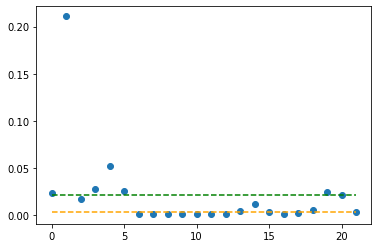

In [117]:
doc  = doc_top_matrix.loc['Doc0'].values
print
fig,ax = plt.subplots()

vals = np.nonzero(doc)
x = range(0,len(doc[vals]))

mean = doc[-2]
median = doc[-1]
print(mean)
means = [mean]*len(doc[vals])
medians = [median]*len(doc[vals])

ax.scatter(range(0,len(doc[vals])), doc[vals])
ax.plot(x, means, linestyle='--', color="green")
ax.plot(x, medians, linestyle="--", color="orange")

plt.show()

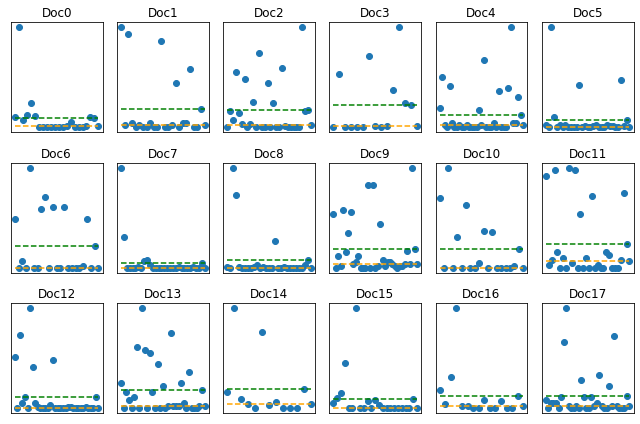

In [118]:
grid = np.random.rand(4, 4)
docs = [f"Doc{a}" for a in range(18)]

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, docname in zip(axs.flat, docs):
    doc  = doc_top_matrix.loc[docname].values
    vals = np.nonzero(doc)
    x = range(0,len(doc[vals]))

    mean = [doc[-2]]*len(doc[vals])
    median = [doc[-1]]*len(doc[vals])

    ax.scatter(range(0,len(doc[vals])), doc[vals])
    ax.plot(x, mean, linestyle='--', color="green")
    ax.plot(x, median, linestyle="--", color="orange")
    ax.set_title(docname)

plt.tight_layout()
plt.show()

In [119]:
doc_top_matrix.to_csv(f"{PATH}/models/doc_top_matrix.csv")

In [120]:
def discretize(row):
    if pd.notnull(row['mean']):
        row[row < row['mean']] = 0
        row[row >= row['mean']] = 1
        return row.astype(int)
    else: 
        return row
        

In [121]:
discrete_dtm = doc_top_matrix.copy().apply(lambda row: discretize(row), axis=1)

In [122]:
discrete_dtm = discrete_dtm.fillna(0)
discrete_dtm = discrete_dtm.astype(int)

In [123]:
discrete_dtm

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,Topic30,Topic31,Topic32,Topic33,Topic34,Topic35,Topic36,Topic37,Topic38,Topic39,...,Topic462,Topic463,Topic464,Topic465,Topic466,Topic467,Topic468,Topic469,Topic470,Topic471,Topic472,Topic473,Topic474,Topic475,Topic476,Topic477,Topic478,Topic479,Topic480,Topic481,Topic482,Topic483,Topic484,Topic485,Topic486,Topic487,Topic488,Topic489,Topic490,Topic491,Topic492,Topic493,Topic494,Topic495,Topic496,Topic497,Topic498,Topic499,mean,median
Doc0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
Doc1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Doc2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Doc3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
Doc4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc22520,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Doc22521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Doc22522,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Doc22523,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [124]:
discrete_dtm.drop(columns=["mean", "median"], inplace=True)

In [139]:
sums = discrete_dtm.sum(axis=0)[:-1]
discrete_dtm['source'] = sources.values

In [126]:
discrete_dtm

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,Topic30,Topic31,Topic32,Topic33,Topic34,Topic35,Topic36,Topic37,Topic38,Topic39,...,Topic461,Topic462,Topic463,Topic464,Topic465,Topic466,Topic467,Topic468,Topic469,Topic470,Topic471,Topic472,Topic473,Topic474,Topic475,Topic476,Topic477,Topic478,Topic479,Topic480,Topic481,Topic482,Topic483,Topic484,Topic485,Topic486,Topic487,Topic488,Topic489,Topic490,Topic491,Topic492,Topic493,Topic494,Topic495,Topic496,Topic497,Topic498,Topic499,source
Doc0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,sing tao daily
Doc1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sing tao daily
Doc2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,mingpao
Doc3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,sing tao daily
Doc4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,sing tao daily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc22520,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mingpao
Doc22521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mingpao
Doc22522,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mingpao
Doc22523,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mingpao


In [127]:
discrete_dtm.to_csv(f"{PATH}/models/discrete_dtm.csv")

In [128]:
node_list = discrete_dtm.groupby('source').sum().T

In [129]:
node_list

source,mingpao,oriental daily news,sing tao daily
Topic0,2350,93,1113
Topic1,416,13,1010
Topic2,18,21,175
Topic3,407,120,1344
Topic4,264,11,225
...,...,...,...
Topic495,153,68,441
Topic496,150,69,262
Topic497,123,69,204
Topic498,180,202,185


In [140]:
len(sums)

500

In [130]:
node_list.columns

Index(['mingpao', 'oriental daily news', 'sing tao daily'], dtype='object', name='source')

In [141]:
node_list["totalcount"] = sums.values
node_list["label"] = topics.values

# Change the order
node_list = node_list[["label", "totalcount", 'mingpao', 'oriental daily news', 'sing tao daily']]

In [142]:
node_list.label = node_list.label.apply(lambda row: [re.search("\w+", a).group(0) for a in row.split()])

In [143]:
node_list.sort_values(by="totalcount", ascending=False).head(30)

source,label,totalcount,mingpao,oriental daily news,sing tao daily
Topic68,"[肺炎, 疫情, 內地, 新冠, 抗擊, 新冠, 疫情, 美國, 疫情, 香港, 疫情, 近...",9414,2802,1639,4973
Topic0,"[冠狀, 病毒, 新型, 冠狀, 病毒, 患者, 爆發, 新型, 病毒, COVID, 確診...",3556,2350,93,1113
Topic9,"[疫情, 影響, 影響, 不少, 影響, 今年, 影響, 全球, 明報, 專訊受, 影響, ...",2534,991,337,1206
Topic3,"[確診, 病例, 肺炎, 確診, 病例, 其中, 病例, 增至, 出現, 確診, 病例, 新...",1871,407,120,1344
Topic1,"[報道, 新冠, 相關, 報道, 肺炎, 各國, 日報, 報道, 密接, 觸者, 疫情, 陰...",1439,416,13,1010
Topic20,"[感染, 新冠, 不幸, 感染, 肺炎, 風險, 肺炎, 去世, 自己, 感染, 肺炎, A...",1409,276,180,953
Topic80,"[肺炎, 確診, 宗新冠, 肺炎, 新增, 宗新冠, 一日, 新增, 昨日, 新增, 南韓,...",1268,206,119,943
Topic94,"[確診, 個案, 本地, 確診, 個案, 患者, 多宗, 確診, 肺炎, 確診, 個案, 死...",1183,312,230,641
Topic24,"[防疫, 措施, 加強, 防疫, 做好, 防疫, 政府, 防疫, 採取, 防疫, 放寬, 防...",1177,362,251,564
Topic69,"[疫情, 爆發, 爆發, 以來, 爆發, 初期, 爆發, 期間, 爆發, 至今, 爆發, 影...",1089,317,172,600


In [144]:
node_list.reset_index(inplace=True)
node_list.rename(columns={"index": "topic", "source": "index"}, inplace=True)

node_list.to_csv(f"{PATH}/hk_ch_nodelist.csv")

In [145]:
node_list

source,topic,label,totalcount,mingpao,oriental daily news,sing tao daily
0,Topic0,"[冠狀, 病毒, 新型, 冠狀, 病毒, 患者, 爆發, 新型, 病毒, COVID, 確診...",3556,2350,93,1113
1,Topic1,"[報道, 新冠, 相關, 報道, 肺炎, 各國, 日報, 報道, 密接, 觸者, 疫情, 陰...",1439,416,13,1010
2,Topic2,"[患上, 新冠, 確診, 患上, 肺炎, 去世, 進行, 家居, 病情, 惡化, 日前, 宣...",214,18,21,175
3,Topic3,"[確診, 病例, 肺炎, 確診, 病例, 其中, 病例, 增至, 出現, 確診, 病例, 新...",1871,407,120,1344
4,Topic4,"[宗確診, 病例, 累計, 宗確診, 病例, 死亡, 新增, 宗確診, 累計, 新增, 新增...",500,264,11,225
...,...,...,...,...,...,...
495,Topic495,"[新增, 確診, 單日, 新增, 每日, 新增, 昨日, 新增, 全國, 新增, 湖北, 以...",662,153,68,441
496,Topic496,"[控制, 疫情, 疫情, 措施, 有效, 控制, 採取, 措施, 政府, 控制, 衛生, 部...",481,150,69,262
497,Topic497,"[疫情, 不少, 今次, 疫情, 周三, 宣布, 宣布, 所有, 防疫, 期間, 要求, 工...",396,123,69,204
498,Topic498,"[特首, 鄭月, 行政, 會議, 共度, 時艱, 薪酬, 調整, 市民, 共度, 問責, 官...",567,180,202,185


In [146]:
# Contact tracing ones! 
node_list.reindex([91])

source,topic,label,totalcount,mingpao,oriental daily news,sing tao daily
91,Topic91,"[應用, 程式, 手機, 應用, 資訊, 科技, 今年, 第一季, 接觸者, 追蹤, 宣布,...",230,99,30,101


### Edge List

In [160]:
from itertools import combinations
from collections import OrderedDict 
from dateutil.parser import parse


In [149]:
df = pd.read_csv(f"{PATH}/hk_ch_proc.csv")
doc_top_matrix = pd.read_csv(f"{PATH}/models/doc_top_matrix.csv")
discrete_dtm = pd.read_csv(f"{PATH}/models/discrete_dtm.csv")

In [150]:
def get_weekday(num):
    # https://docs.python.org/3/library/datetime.html#datetime.date.isocalendar
    if num == 1: return "Monday"
    if num == 2: return "Tuesday"
    if num == 3: return "Wednesday"
    if num == 4: return "Thursday"
    if num == 5: return "Friday"
    if num == 6: return "Saturday"
    if num == 7: return "Sunday"

In [ ]:
# def get_political(source):
#     """
#     Returns true if liberal, false if conservative
#     """
#     if source in ["한겨레", "경향신문"]:
#         return "liberal"
#     else: return "conservative"

In [151]:
def choose(n, k):
    # https://stackoverflow.com/questions/3025162/statistics-combinations-in-python/3025194#3025194
    """
    A fast way to calculate binomial coefficients by Andrew Dalke (contrib).
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

In [152]:
new_columns = discrete_dtm.columns.values
discrete_dtm.columns = new_columns

In [153]:
# Number of topics in each document
num_topics_per_document_list = discrete_dtm.sum(axis=1).values

# Figure out combinations space
num_combinations = sum([choose(a, 2) for a in num_topics_per_document_list[:-1]])


In [154]:
num_combinations

402126

In [155]:
# Then pre-allocate that much space for the df that will hold the edge list
columns = ["node1", "node2", "documentId", "date", "day_of_week", "week_of_year", "month", "newssource", "political"]
edgelist = pd.DataFrame(columns=columns, index=range(num_combinations))


In [156]:
discrete_dtm['num_topics_in_document'] = num_topics_per_document_list

In [157]:
df.reset_index(inplace=True, drop=True)

In [ ]:
i = 0
for index, row in discrete_dtm.iterrows():
    print(index)
    if row.num_topics_in_document > 1:
#         print(row.num_topics_in_document)
        
        documentId = index#int(re.search('\d+', index).group())
        document = df.loc[documentId] # fetch document
        newssource = document.source
        # political = get_political(newssource)
        
        date = parse(document.date)
#         print(document.source)
        _, week_of_year, day_of_week = date.isocalendar()
        month = date.month
        day_of_week = get_weekday(day_of_week)
        
        topic_combinations = combinations(row.index[row == 1], 2)
        
        for node1, node2 in topic_combinations:
#             print(node1, node2)
            
            onerow = pd.Series({"node1": node1, "node2": node2, "documentId": documentId, 
                                "date": date, "day_of_week": day_of_week, "week_of_year": week_of_year,
                                "month": month, "newssource": newssource})
            
            edgelist.iloc[i] = onerow
            i += 1


In [163]:
edgelist

,node1,node2,documentId,date,day_of_week,week_of_year,month,newssource,political
0,Topic0,Topic3,0,2020-01-24 00:00:00,Friday,4,1,sing tao daily,NaN
1,Topic0,Topic80,0,2020-01-24 00:00:00,Friday,4,1,sing tao daily,NaN
2,Topic0,Topic90,0,2020-01-24 00:00:00,Friday,4,1,sing tao daily,NaN
3,Topic0,Topic114,0,2020-01-24 00:00:00,Friday,4,1,sing tao daily,NaN
4,Topic0,Topic495,0,2020-01-24 00:00:00,Friday,4,1,sing tao daily,NaN
...,...,...,...,...,...,...,...,...,...
402121,Topic9,Topic68,22523,2020-06-23 22:58:13,Tuesday,26,6,mingpao,NaN
402122,Topic9,Topic334,22523,2020-06-23 22:58:13,Tuesday,26,6,mingpao,NaN
402123,Topic48,Topic68,22523,2020-06-23 22:58:13,Tuesday,26,6,mingpao,NaN
402124,Topic48,Topic334,22523,2020-06-23 22:58:13,Tuesday,26,6,mingpao,NaN


In [164]:
edgelist.to_csv(f"{PATH}/hk_ch_edgelist.csv")

In [165]:
# WEIGHTED EDGE LIST

df_weight = edgelist[["node1", "node2"]]
df_weight = df_weight.groupby(df_weight.columns.tolist(),as_index=False).size().reset_index().rename(columns={0:'weight'})


In [166]:
df_weight[df_weight['weight'] > 1]

,node1,node2,weight
0,Topic0,Topic1,180
1,Topic0,Topic100,14
2,Topic0,Topic101,16
3,Topic0,Topic102,69
4,Topic0,Topic103,102
...,...,...,...
63772,Topic99,Topic406,3
63773,Topic99,Topic460,2
63777,Topic99,Topic484,2
63779,Topic99,Topic488,4


In [167]:
df_weight.sort_values("weight", ascending=False, inplace=True)
weights = df_weight.sort_values("weight", ascending=False).weight.values


(array([42., 22., 12.,  6.,  3.,  7.,  2.,  2.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 170.        ,  220.86666667,  271.73333333,  322.6       ,
         373.46666667,  424.33333333,  475.2       ,  526.06666667,
         576.93333333,  627.8       ,  678.66666667,  729.53333333,
         780.4       ,  831.26666667,  882.13333333,  933.        ,
         983.86666667, 1034.73333333, 1085.6       , 1136.46666667,
        1187.33333333, 1238.2       , 1289.06666667, 1339.93333333,
        1390.8       , 1441.66666667, 1492.53333333, 1543.4       ,
        1594.26666667, 1645.13333333, 1696.        ]),
 <a list of 30 Patch objects>)

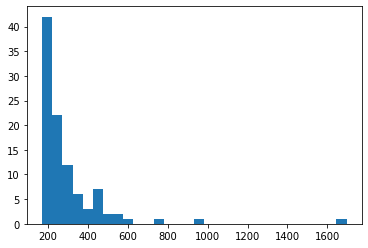

In [168]:
plt.hist(weights[:100], bins = 30)

In [169]:
df_weight

,node1,node2,weight
61236,Topic9,Topic68,1696
428,Topic0,Topic68,965
875,Topic1,Topic68,770
54760,Topic68,Topic69,600
37639,Topic3,Topic68,557
...,...,...,...
47859,Topic459,Topic467,1
47858,Topic459,Topic466,1
31528,Topic25,Topic340,1
47856,Topic459,Topic464,1


In [170]:
df_weight.to_csv(f"{PATH}/hk_ch_edgelist_weight.csv")

### Filtering, finding articles to analyze

In [38]:
df = pd.read_csv(f"{PATH}/hk_ch_proc.csv")
edgelist_full = pd.read_csv(f"{PATH}/hk_ch_edgelist.csv")

edgelist = pd.read_csv(f"{PATH}/hk_ch_edgelist_weight.csv")
edgelist.drop(columns="Unnamed: 0", inplace=True)

nodelist = pd.read_csv(f"{PATH}/hk_ch_nodelist.csv")
nodelist.drop(columns="Unnamed: 0", inplace=True)

In [39]:
topics = pd.read_csv(f'{PATH}/models/nmf_topics.txt', header=None)

In [13]:
topics

,0
0,冠狀 病毒 新型 冠狀 病毒 患者 爆發 新型 病毒 COVID 確診 新型 表示 新型 C...
1,報道 新冠 相關 報道 肺炎 各國 日報 報道 密接 觸者 疫情 陰霾 閉門 舉行 懷疑 個...
2,患上 新冠 確診 患上 肺炎 去世 進行 家居 病情 惡化 日前 宣布 肺炎 情況 一家 醫...
3,確診 病例 肺炎 確診 病例 其中 病例 增至 出現 確診 病例 新增 病例 增加 病例 超...
4,宗確診 病例 累計 宗確診 病例 死亡 新增 宗確診 累計 新增 新增 死亡 死亡 累計 J...
...,...
495,新增 確診 單日 新增 每日 新增 昨日 新增 全國 新增 湖北 以外 湖北 地區 新增 疑...
496,控制 疫情 疫情 措施 有效 控制 採取 措施 政府 控制 衛生 部門 期護理 中心 疫情 ...
497,疫情 不少 今次 疫情 周三 宣布 宣布 所有 防疫 期間 要求 工放無薪 不少 地方 距離...
498,特首 鄭月 行政 會議 共度 時艱 薪酬 調整 市民 共度 問責 官員 會議 成員 鄭月 表...


In [14]:
nodelist

,topic,label,totalcount,mingpao,oriental daily news,sing tao daily
0,Topic0,"['冠狀', '病毒', '新型', '冠狀', '病毒', '患者', '爆發', '新型...",3556,2350,93,1113
1,Topic1,"['報道', '新冠', '相關', '報道', '肺炎', '各國', '日報', '報道...",1439,416,13,1010
2,Topic2,"['患上', '新冠', '確診', '患上', '肺炎', '去世', '進行', '家居...",214,18,21,175
3,Topic3,"['確診', '病例', '肺炎', '確診', '病例', '其中', '病例', '增至...",1871,407,120,1344
4,Topic4,"['宗確診', '病例', '累計', '宗確診', '病例', '死亡', '新增', '...",500,264,11,225
...,...,...,...,...,...,...
495,Topic495,"['新增', '確診', '單日', '新增', '每日', '新增', '昨日', '新增...",662,153,68,441
496,Topic496,"['控制', '疫情', '疫情', '措施', '有效', '控制', '採取', '措施...",481,150,69,262
497,Topic497,"['疫情', '不少', '今次', '疫情', '周三', '宣布', '宣布', '所有...",396,123,69,204
498,Topic498,"['特首', '鄭月', '行政', '會議', '共度', '時艱', '薪酬', '調整...",567,180,202,185


In [19]:
topics.reindex([91])

,0
91,應用 程式 手機 應用 資訊 科技 今年 第一季 接觸者 追蹤 宣布 推出 蘋果 公司 可以...


In [16]:
# Contact tracing indexes
ct_idxs = ["Topic91"]

ct_topics = edgelist[edgelist['node1'].isin(ct_idxs)]
ct_topics = ct_topics.append(edgelist[edgelist['node2'].isin(ct_idxs)])
ct_topics = ct_topics.sort_values(by="weight", ascending=False)

In [17]:
ct_topics

,node1,node2,weight
286,Topic68,Topic91,99
2054,Topic9,Topic91,28
2145,Topic0,Topic91,27
2664,Topic61,Topic91,23
3110,Topic91,Topic485,21
...,...,...,...
47852,Topic91,Topic236,1
47853,Topic91,Topic235,1
47854,Topic91,Topic234,1
47858,Topic91,Topic227,1


In [20]:
edges = ct_topics[:15]

In [21]:
topics = list(set(list_flatten(edges[['node1', 'node2']].values.tolist())))

# dictionary mapping topic to name
topic_name_dict = nodelist[nodelist.topic.isin(topics)]
topic_name_dict["label"] = topic_name_dict.label.apply(lambda a: ast.literal_eval(a))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
nodelist_weighted = nodelist.sort_values(by="totalcount", ascending=False)
nodelist_weighted.reset_index(drop=False, inplace=True)
nodelist_weighted[nodelist_weighted.topic.isin(ct_idxs)]

,index,topic,label,totalcount,mingpao,oriental daily news,sing tao daily
185,91,Topic91,"['應用', '程式', '手機', '應用', '資訊', '科技', '今年', '第一...",230,99,30,101


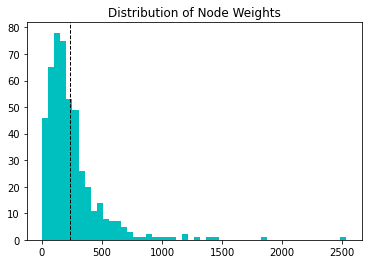

In [24]:
weights = nodelist_weighted[nodelist_weighted.totalcount != 0]
weights = weights[weights.totalcount < 3000].totalcount.values

result = plt.hist(weights, 50, color='c')
result = plt.axvline(230, color='k', linestyle='dashed', linewidth=1) # 91 - 接觸者 追蹤
result = plt.title("Distribution of Node Weights")

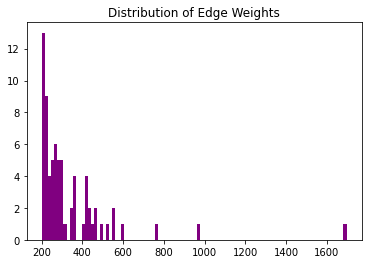

In [25]:
e_weights = edgelist[edgelist.weight > 200]
e_weights = e_weights.weight.values

result = plt.hist(e_weights, 100, color = 'purple')
result = plt.title("Distribution of Edge Weights")

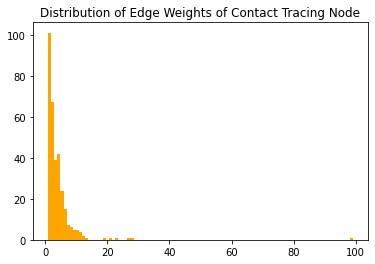

In [27]:
result = plt.hist(ct_topics.weight.values, 100, color = 'orange')
result = plt.title("Distribution of Edge Weights of Contact Tracing Node")

In [28]:
len(ct_topics)

324

In [33]:
print(
    len(ct_topics[ct_topics.weight > 15]),
    len(ct_topics[ct_topics.weight > 10]), 
    len(ct_topics[ct_topics.weight > 5]) 
)

6 13 51


In [44]:
threshold = 10
threshold = 5

top_edges = ct_topics[ct_topics.weight > threshold]

# top_edges

In [45]:
for index, row in top_edges.iterrows():
    # Find all the edges that include this specific edge
    edges = edgelist_full[(edgelist_full.node1 == row.node1) & (edgelist_full.node2 == row.node2)]
    
    # Get the document ids
    docIds = edges.documentId.values
    
    # Get the documents corresponding to these edges
    documents = df[df.index.isin(docIds)][["title", "date", "url", "keyword", "text", "source"]]
    documents.reset_index(inplace=True)
    
    textfile = f"[{len(edges)}]{row.node1}-{row.node2}.csv"
    print(textfile)
    
    documents.to_csv(f"{PATH}/texts_to_analyze_{threshold}/{textfile}")

[99]Topic68-Topic91.csv
[28]Topic9-Topic91.csv
[27]Topic0-Topic91.csv
[23]Topic61-Topic91.csv
[21]Topic91-Topic485.csv
[19]Topic1-Topic91.csv
[13]Topic91-Topic126.csv
[12]Topic13-Topic91.csv
[12]Topic91-Topic174.csv
[11]Topic91-Topic95.csv
[11]Topic91-Topic181.csv
[11]Topic11-Topic91.csv
[11]Topic91-Topic194.csv
[10]Topic91-Topic497.csv
[10]Topic91-Topic94.csv
[10]Topic91-Topic167.csv
[10]Topic69-Topic91.csv
[10]Topic77-Topic91.csv
[9]Topic26-Topic91.csv
[9]Topic5-Topic91.csv
[9]Topic70-Topic91.csv
[9]Topic91-Topic106.csv
[9]Topic91-Topic266.csv
[8]Topic91-Topic127.csv
[8]Topic91-Topic173.csv
[8]Topic91-Topic117.csv
[8]Topic34-Topic91.csv
[8]Topic58-Topic91.csv
[8]Topic16-Topic91.csv
[7]Topic17-Topic91.csv
[7]Topic91-Topic489.csv
[7]Topic20-Topic91.csv
[7]Topic30-Topic91.csv
[7]Topic33-Topic91.csv
[7]Topic88-Topic91.csv
[7]Topic91-Topic271.csv
[6]Topic91-Topic183.csv
[6]Topic91-Topic264.csv
[6]Topic91-Topic318.csv
[6]Topic91-Topic270.csv
[6]Topic15-Topic91.csv
[6]Topic91-Topic228.csv
[

In [46]:
# get the list of nodes/topics
topics = list(set(list_flatten(top_edges[['node1', 'node2']].values.tolist())))

# dictionary mapping topic to name
topic_name_dict = nodelist[nodelist.topic.isin(topics)]
topic_name_dict["label"] = topic_name_dict.label.apply(lambda a: ast.literal_eval(a))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
node1_bow = []
node2_bow = []

for index, row in top_edges.iterrows():
    bow = topic_name_dict[topic_name_dict.topic == row.node1].label.values[0]
    node1_bow.append(' '.join(["-".join(bow[i:i+2]) for i in range(0, len(bow), 2)]))
    
    bow = topic_name_dict[topic_name_dict.topic == row.node2].label.values[0]
    node2_bow.append(' '.join(["-".join(bow[i:i+2]) for i in range(0, len(bow), 2)]))
    
    
top_edges["node1_bow"] = node1_bow
top_edges["node2_bow"] = node2_bow

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [48]:
top_edges.to_csv(f"{PATH}/texts_to_analyze_{threshold}/top_edges_table.csv")

# English

### Clean, Tokenize, Stem, Lemmatize

In [58]:
df = pd.read_csv("/Users/yenniejun/Documents/code/eugene/coronavirus/hong kong/data/raw_english.csv")
df = df[df.date < "2020-06-24"]
df = df[~df.text.isna()]
df.drop(columns="Unnamed: 0", inplace=True)
df.reset_index(inplace=True, drop=True)

In [52]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords;
from nltk.tokenize import word_tokenize
STOPWORDS = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yenniejun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yenniejun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
STOPWORDS.extend(["said", "also", "would", "like"] )

In [53]:
def clean_text(text):
    remove_char = string.punctuation + '…' + '\xa0' + '·' + '\n' + \
        '※' + '‘' + '’' + '\'' + '▲' + '∼' + "△" + "“" + "”" + "▶" + "․" + \
        "▸"
    text = re.sub('http[s]?://\S+', '', text) # Remove http urls
    text = re.sub('\S*@\S*\s?', '', text) # Remove emails
    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
    text = re.sub(r'[%s]' % re.escape(remove_char), '', text) # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers
    text = re.sub('\'', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text.lower()


In [63]:
def preprocess(text):
    result = []
    for token in word_tokenize(text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatizer.lemmatize(token))
    return result

In [59]:
df['clean_text'] = df['text'].map(lambda x: clean_text(x))

In [61]:
# Number mentioning "contact tracing"
contact_tracing = df[df.text.str.contains("contact tracing|contact-tracing|contact tracking|contact-tracking")]
len(contact_tracing)

370

In [64]:
# Tokenize and remove stopwords (this takes a while)
df['text_proc_token'] = df['clean_text'].map(preprocess)


In [65]:
df['text_proc'] = df['text_proc_token'].apply(lambda a: ' '.join(a))


In [66]:
df.head()

,title,date,url,source,keyword,country,text,clean_text,text_proc_token,text_proc
0,Coronavirus: Thai king criticised for staying ...,2019-09-29 06:00:11+00:00,https://www.scmp.com/magazines/style/celebrity...,scmp,coronavirus,hong kong,Sheikhs from the oil-rich Middle East have had...,sheikhs from the oilrich middle east have had ...,"[sheikh, oilrich, middle, east, accept, second...",sheikh oilrich middle east accept second billi...
1,Hong Kong takes emergency measures as mystery ...,2019-12-31 06:35:29+00:00,https://www.scmp.com/news/china/politics/artic...,scmp,coronavirus,hong kong,Most cases have originated from a single seafo...,most cases have originated from a single seafo...,"[case, originated, single, seafood, market, he...",case originated single seafood market health w...
2,World Health Organisation in touch with Beijin...,2020-01-01 08:59:49+00:00,https://www.scmp.com/news/china/politics/artic...,scmp,coronavirus,hong kong,Authorities in central city of Wuhan say marke...,authorities in central city of wuhan say marke...,"[authority, central, city, wuhan, market, clos...",authority central city wuhan market closed ind...
3,Hong Kong woman hospitalised and quarantined a...,2020-01-02 04:34:54+00:00,https://www.scmp.com/news/hong-kong/health-env...,scmp,coronavirus,hong kong,Patient admitted to Tuen Mun Hospital displayi...,patient admitted to tuen mun hospital displayi...,"[patient, admitted, tuen, hospital, displaying...",patient admitted tuen hospital displaying symp...
4,Wuhan pneumonia: Hong Kong patients who visite...,2020-01-02 13:30:24+00:00,https://www.scmp.com/news/china/society/articl...,scmp,coronavirus,hong kong,City’s health authorities unveil raft of preve...,citys health authorities unveil raft of preven...,"[city, health, authority, unveil, raft, preven...",city health authority unveil raft prevention m...


In [70]:
df.text_proc = df.text_proc.str.replace("contact tracking", "contact tracing")
df.text_proc = df.text_proc.str.replace("contacttracking", "contact tracing")
df.text_proc = df.text_proc.str.replace("contact tracked", "contact tracing")
df.text_proc = df.text_proc.str.replace("contact track", "contact tracing")
df.text_proc = df.text_proc.str.replace("contact tracer", "contact tracing")
df.text_proc = df.text_proc.str.replace("contact trace", "contact tracing")
df.text_proc = df.text_proc.str.replace("contacttracer", "contact tracing")
df.text_proc = df.text_proc.str.replace("contacttracing", "contact tracing")
df.text_proc = df.text_proc.str.replace("contacttrace", "contact tracing")
df.text_proc = df.text_proc.str.replace("contact-tracing", "contact tracing")
df.text_proc = df.text_proc.str.replace("contact-tracking", "contact tracing")


In [73]:
# Number mentioning "contact tracing"
contact_tracing = df[df.text_proc.str.contains("contact tracing")]
len(contact_tracing)

385

In [74]:
df = df.drop_duplicates('text_proc')
df.reset_index(drop=True, inplace=True)
len(df)

4822

In [81]:
df.to_csv(f"{PATH}/hk_eng_proc.csv")

### Topic Model


In [83]:
df = pd.read_csv(f"{PATH}/hk_eng_proc.csv")

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

In [86]:
def show_topics(a, vocab, num_top_words):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [87]:
# https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6
def document_topic_matrix(model, data, n_components):
    # column names
    topicnames = ["Topic" + str(i) for i in range(n_components)]
    # index names
    docnames = ["Doc" + str(i) for i in range(len(data))]
    # Make the pandas dataframe
    df_document_topic = pd.DataFrame(np.round(model, 2), columns=topicnames, index=docnames)
    # Get dominant topic for each document
    dominant_topic = np.argmax(df_document_topic.values, axis=1)
    df_document_topic["dominant_topic"] = dominant_topic
    return df_document_topic

In [88]:
def topic_keyword_matrix(model, vectorizer):
    # Topic-Keyword Matrix
    df_topic_keywords = pd.DataFrame(model.components_)
    # Assign Column and Index
    df_topic_keywords.columns = vectorizer.get_feature_names()
    topicnames = ["Topic" + str(i) for i in range(n_components)]

    df_topic_keywords.index = topicnames
    # View
    df_topic_keywords.head()
    return df_topic_keywords

In [89]:
def topic_keyword_matrix(model, vectorizer):
    # Topic-Keyword Matrix
    df_topic_keywords = pd.DataFrame(model.components_)
    # Assign Column and Index
    df_topic_keywords.columns = vectorizer.get_feature_names()
    topicnames = ["Topic" + str(i) for i in range(n_components)]

    df_topic_keywords.index = topicnames
    # View
    df_topic_keywords.head()
    return df_topic_keywords

In [90]:
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    row = vectors[row_id].T.todense()
    return top_tfidf_feats(row, features, top_n)

In [93]:
contact_tracing = df[df.text_proc.str.contains("contact tracing")]

In [95]:
num_articles = len(df)
# num_articles = 10000 # This is for a small subset for playing around

documents = [''.join(a) for a in df[0:num_articles].text_proc] 
sources = df[0:num_articles].source

n_components = 100

In [96]:
nmf = NMF(n_components=n_components, random_state=1, init='nndsvd')
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df = 0.8, ngram_range = (2,2), lowercase=False, max_features=5000)
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

In [97]:
# CHECK: Make sure that contact tracing exists in the vectorizer's feature names
"contact tracing" in tfidf_vectorizer.get_feature_names() 

True

In [98]:
%time nmf_tfidf_vec = nmf.fit_transform(tfidf_vectors)

CPU times: user 1min 2s, sys: 5.17 s, total: 1min 8s
Wall time: 40.4 s


In [99]:
vocab = np.array(tfidf_vectorizer.get_feature_names())
num_top_words = 50
nmf_topics = show_topics(nmf.components_, vocab, num_top_words)

In [101]:
nmf_topics[39]

'contact tracing apple google tech company close contact personal data metre away people used least cent cent population australian government health authority time come blog post onset symptom health code test positive public health return normal south wale data collected contact people border control expert warn associate professor lockdown measure european country circuit breaker health university university south tech giant people risk phone number come together ease lockdown australia zealand le likely restriction eased infected person social life older people normal life public policy could made real name international health herd immunity information technology contain spread many people le cent'

In [106]:
# # TO SAVE
# with open(f'{PATH}/models_eng/nmf_vectorizer_bigrams.pk', 'wb') as fin:
#     pickle.dump(tfidf_vectorizer, fin)
# with open(f'{PATH}/models_eng/nmf_vectors_bigrams.pk', 'wb') as fin:
#     pickle.dump(tfidf_vectors, fin)
# with open(f'{PATH}/models_eng/nmf_tfidf_vec_bigrams.pk', 'wb') as fin:
#     pickle.dump(nmf_tfidf_vec, fin)
# with open(f'{PATH}/models_eng/nmf_topics.txt', "w") as fin: 
#     fin.writelines("%s\n" % p for p in nmf_topics)


### Node List

In [107]:
# TO LOAD
with open(f'{PATH}/models_eng/nmf_vectors_bigrams.pk', 'rb') as file:
    vectors = pickle.load(file)
with open(f'{PATH}/models_eng/nmf_tfidf_vec_bigrams.pk', 'rb') as file:
    vec = pickle.load(file)
topics = pd.read_csv(f'{PATH}/models_eng/nmf_topics.txt', sep=",", header=None)[0]


In [108]:
# Build the document-topic matrix
# https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

topicnames = ["Topic" + str(i) for i in range(n_components)]
docnames = ["Doc" + str(i) for i in range(len(documents))] # Index names
doc_top_matrix = pd.DataFrame(np.round(vec, 3), columns=topicnames, index=docnames)
mean = doc_top_matrix.apply(lambda row: np.mean(row.values[np.nonzero(row.values)]),axis=1)
median = doc_top_matrix.apply(lambda row: np.median(row.values[np.nonzero(row.values)]),axis=1)
doc_top_matrix["mean"] = mean
doc_top_matrix["median"] = median

Plot the distribution of one document


0.021750000000000002


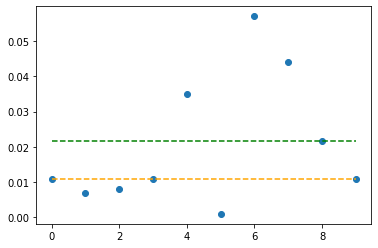

In [110]:
doc  = doc_top_matrix.loc['Doc0'].values
fig,ax = plt.subplots()

vals = np.nonzero(doc)
x = range(0,len(doc[vals]))

mean = doc[-2]
median = doc[-1]
print(mean)
means = [mean]*len(doc[vals])
medians = [median]*len(doc[vals])

ax.scatter(range(0,len(doc[vals])), doc[vals])
ax.plot(x, means, linestyle='--', color="green")
ax.plot(x, medians, linestyle="--", color="orange")

plt.show()

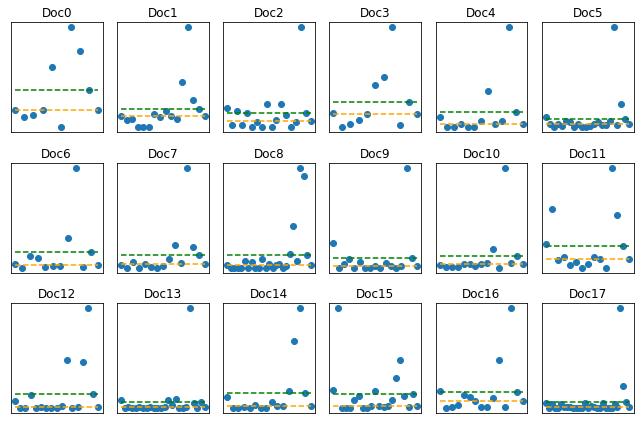

In [111]:
grid = np.random.rand(4, 4)
docs = [f"Doc{a}" for a in range(18)]

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, docname in zip(axs.flat, docs):
    doc  = doc_top_matrix.loc[docname].values
    vals = np.nonzero(doc)
    x = range(0,len(doc[vals]))

    mean = [doc[-2]]*len(doc[vals])
    median = [doc[-1]]*len(doc[vals])

    ax.scatter(range(0,len(doc[vals])), doc[vals])
    ax.plot(x, mean, linestyle='--', color="green")
    ax.plot(x, median, linestyle="--", color="orange")
    ax.set_title(docname)

plt.tight_layout()
plt.show()

In [112]:
doc_top_matrix.to_csv(f"{PATH}/models_eng/doc_top_matrix.csv")

In [113]:
def discretize(row):
    if pd.notnull(row['mean']):
        row[row < row['mean']] = 0
        row[row >= row['mean']] = 1
        return row.astype(int)
    else: 
        return row
        

In [114]:
discrete_dtm = doc_top_matrix.copy().apply(lambda row: discretize(row), axis=1)
discrete_dtm = discrete_dtm.fillna(0)
discrete_dtm = discrete_dtm.astype(int)
discrete_dtm.drop(columns=["mean", "median"], inplace=True)


In [126]:
sums = discrete_dtm.sum(axis=0)[:-1]
discrete_dtm['source'] = sources.values

In [119]:
discrete_dtm.to_csv(f"{PATH}/models_eng/discrete_dtm.csv")

In [120]:
node_list = discrete_dtm.groupby('source').sum().T

In [128]:
node_list["totalcount"] = sums.values
node_list["label"] = topics.values

# Change the order
node_list = node_list[["label", "totalcount", "hong kong fp", "scmp"]]

In [132]:
node_list.label = node_list.label.apply(lambda row: [re.search("\w+", a).group(0) for a in row.split()])

In [133]:
node_list.sort_values(by="totalcount", ascending=False).head(30)

source,label,totalcount,hong kong fp,scmp
Topic0,"[hong, kong, kong, government, people, hong, k...",1169,179,990
Topic87,"[confirmed, case, number, confirmed, case, cor...",1127,81,1046
Topic89,"[united, state, donald, trump, state, departme...",1012,82,930
Topic60,"[public, health, health, system, infectious, d...",758,47,711
Topic88,"[first, case, health, ministry, health, minist...",729,39,690
Topic97,"[medical, worker, medical, staff, doctor, nurs...",717,48,669
Topic70,"[social, medium, fake, news, medium, platform,...",672,55,617
Topic2,"[transparency, report, hkfp, code, annual, tra...",514,514,0
Topic58,"[world, health, health, organisation, tedros, ...",501,47,454
Topic71,"[lunar, year, year, holiday, mainland, china, ...",500,25,475


In [134]:
node_list.loc["Topic39"]

source
label           [contact, tracing, apple, google, tech, compan...
totalcount                                                    136
hong kong fp                                                   10
scmp                                                          126
Name: Topic39, dtype: object

In [135]:
node_list.reset_index(inplace=True)
node_list.rename(columns={"index": "topic", "source": "index"}, inplace=True)

In [136]:
node_list.to_csv(f"{PATH}/hk_eng_nodelist.csv")

### Edge List

In [144]:
import datetime


In [137]:
from itertools import combinations
from collections import OrderedDict 

df = pd.read_csv(f"{PATH}/hk_eng_proc.csv")
doc_top_matrix = pd.read_csv(f"{PATH}/models_eng/doc_top_matrix.csv")
discrete_dtm = pd.read_csv(f"{PATH}/models_eng/discrete_dtm.csv")

def get_weekday(num):
    # https://docs.python.org/3/library/datetime.html#datetime.date.isocalendar
    if num == 1: return "Monday"
    if num == 2: return "Tuesday"
    if num == 3: return "Wednesday"
    if num == 4: return "Thursday"
    if num == 5: return "Friday"
    if num == 6: return "Saturday"
    if num == 7: return "Sunday"
def choose(n, k):
    # https://stackoverflow.com/questions/3025162/statistics-combinations-in-python/3025194#3025194
    """
    A fast way to calculate binomial coefficients by Andrew Dalke (contrib).
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

In [138]:
new_columns = discrete_dtm.columns.values
discrete_dtm.columns = new_columns

In [139]:
# Number of topics in each document
num_topics_per_document_list = discrete_dtm.sum(axis=1).values

# Figure out combinations space
num_combinations = sum([choose(a, 2) for a in num_topics_per_document_list[:-1]])


In [140]:
num_combinations

80263

In [141]:
# Then pre-allocate that much space for the df that will hold the edge list
columns = ["node1", "node2", "documentId", "date", "day_of_week", "week_of_year", "month", "newssource"]
edgelist = pd.DataFrame(columns=columns, index=range(num_combinations))


In [142]:
discrete_dtm['num_topics_in_document'] = num_topics_per_document_list

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
i = 0
for index, row in discrete_dtm.iterrows():
    print(index)
    if row.num_topics_in_document > 1:
#         print(row.num_topics_in_document)
        
        documentId = index#int(re.search('\d+', index).group())
        document = df.loc[documentId] # fetch document
        newssource = document.source
        
        date = document.date
#         print(document.source)
        _, week_of_year, day_of_week = date.isocalendar()
        month = document.date.month
        day_of_week = get_weekday(day_of_week)
        
        topic_combinations = combinations(row.index[row == 1], 2)
        
        for node1, node2 in topic_combinations:
#             print(node1, node2)
            
            onerow = pd.Series({"node1": node1, "node2": node2, "documentId": documentId, 
                                "date": date, "day_of_week": day_of_week, "week_of_year": week_of_year,
                                "month": month, "newssource": newssource})
            
            edgelist.iloc[i] = onerow
            i += 1


In [155]:
edgelist

,node1,node2,documentId,date,day_of_week,week_of_year,month,newssource
0,Topic46,Topic70,0,2019-09-29 06:00:11+00:00,Sunday,39,9,scmp
1,Topic46,Topic80,0,2019-09-29 06:00:11+00:00,Sunday,39,9,scmp
2,Topic70,Topic80,0,2019-09-29 06:00:11+00:00,Sunday,39,9,scmp
3,Topic90,Topic95,1,2019-12-31 06:35:29+00:00,Tuesday,1,12,scmp
4,Topic90,Topic97,1,2019-12-31 06:35:29+00:00,Tuesday,1,12,scmp
...,...,...,...,...,...,...,...,...
80258,Topic33,Topic83,4820,2020-06-23 22:14:28+00:00,Tuesday,26,6,scmp
80259,Topic33,Topic91,4820,2020-06-23 22:14:28+00:00,Tuesday,26,6,scmp
80260,Topic73,Topic83,4820,2020-06-23 22:14:28+00:00,Tuesday,26,6,scmp
80261,Topic73,Topic91,4820,2020-06-23 22:14:28+00:00,Tuesday,26,6,scmp


In [165]:
edgelist.to_csv(f"{PATH}/hk_eng_edgelist.csv")

In [157]:
# WEIGHTED EDGE LIST

In [158]:
df_weight = edgelist[["node1", "node2"]]
df_weight = df_weight.groupby(df_weight.columns.tolist(),as_index=False).size().reset_index().rename(columns={0:'weight'})
df_weight.sort_values("weight", ascending=False, inplace=True)
weights = df_weight.sort_values("weight", ascending=False).weight.values

(array([51., 22., 13.,  4.,  4.,  3.,  2.,  0.,  0.,  1.]),
 array([105. , 132.7, 160.4, 188.1, 215.8, 243.5, 271.2, 298.9, 326.6,
        354.3, 382. ]),
 <a list of 10 Patch objects>)

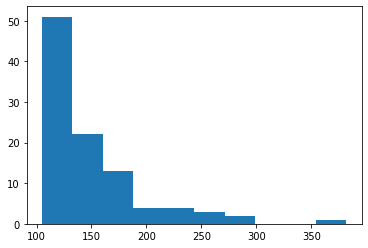

In [160]:
plt.hist(weights[:100], bins = 10)

In [161]:
df_weight[df_weight.node1 == "Topic39"].head()

,node1,node2,weight
2198,Topic39,Topic60,42
2224,Topic39,Topic87,40
2226,Topic39,Topic89,37
2225,Topic39,Topic88,30
2231,Topic39,Topic94,27


In [163]:
df_weight.to_csv(f"{PATH}/hk_eng_edgelist_weight.csv")

### Filtering for Articles to Analyze

In [172]:
df = pd.read_csv(f"{PATH}/hk_eng_proc.csv")
edgelist_full = pd.read_csv(f"{PATH}/hk_eng_edgelist.csv")

edgelist = pd.read_csv(f"{PATH}/hk_eng_edgelist_weight.csv")
edgelist.drop(columns="Unnamed: 0", inplace=True)

nodelist = pd.read_csv(f"{PATH}/hk_eng_nodelist.csv")
nodelist.drop(columns="Unnamed: 0", inplace=True)

topics = pd.read_csv(f'{PATH}/models_eng/nmf_topics.txt', header=None)

In [174]:
topics.loc[39]

0    contact tracing apple google tech company clos...
Name: 39, dtype: object

In [175]:
# Contact tracing indexes
ct_idxs = ["Topic39"]

ct_topics = edgelist[edgelist['node1'].isin(ct_idxs)]
ct_topics = ct_topics.append(edgelist[edgelist['node2'].isin(ct_idxs)])
ct_topics = ct_topics.sort_values(by="weight", ascending=False)

In [177]:
ct_topics

,node1,node2,weight
490,Topic39,Topic60,42
517,Topic39,Topic87,40
582,Topic39,Topic89,37
754,Topic39,Topic88,30
828,Topic39,Topic94,27
...,...,...,...
4093,Topic39,Topic86,1
3951,Topic39,Topic63,1
4068,Topic39,Topic73,1
4083,Topic39,Topic65,1


In [178]:
topics = list(set(list_flatten(edges[['node1', 'node2']].values.tolist())))

In [179]:
# dictionary mapping topic to name
topic_name_dict = nodelist[nodelist.topic.isin(topics)]
topic_name_dict["label"] = topic_name_dict.label.apply(lambda a: ast.literal_eval(a))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
nodelist_weighted = nodelist.sort_values(by="totalcount", ascending=False)
nodelist_weighted.reset_index(drop=False, inplace=True)
nodelist_weighted[nodelist_weighted.topic.isin(ct_idxs)]


,index,topic,label,totalcount,hong kong fp,scmp
68,39,Topic39,"['contact', 'tracing', 'apple', 'google', 'tec...",136,10,126


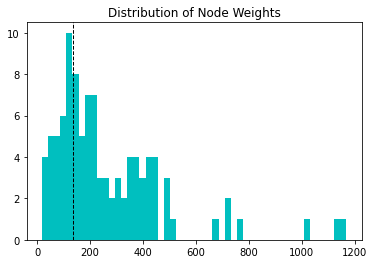

In [182]:
weights = nodelist_weighted[nodelist_weighted.totalcount != 0]
weights = weights[weights.totalcount < 3000].totalcount.values

result = plt.hist(weights, 50, color='c')
result = plt.axvline(136, color='k', linestyle='dashed', linewidth=1) # 39 - contact tracing
result = plt.title("Distribution of Node Weights")

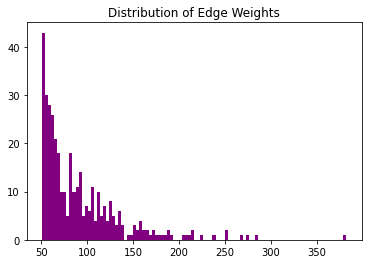

In [186]:
e_weights = edgelist[edgelist.weight > 50]
e_weights = e_weights.weight.values

result = plt.hist(e_weights, 100, color = 'purple')
result = plt.title("Distribution of Edge Weights")

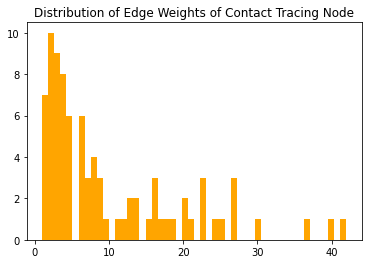

In [187]:
result = plt.hist(ct_topics.weight.values, 50, color = 'orange')
result = plt.title("Distribution of Edge Weights of Contact Tracing Node")

In [188]:
len(ct_topics)

85

In [192]:
print(
    len(ct_topics[ct_topics.weight > 10]),
    len(ct_topics[ct_topics.weight > 5]), 
)

28 45


In [197]:
threshold = 10
threshold = 5

top_edges = ct_topics[ct_topics.weight > threshold]

In [198]:
for index, row in top_edges.iterrows():
    # Find all the edges that include this specific edge
    edges = edgelist_full[(edgelist_full.node1 == row.node1) & (edgelist_full.node2 == row.node2)]
    
    # Get the document ids
    docIds = edges.documentId.values
    
    # Get the documents corresponding to these edges
    documents = df[df.index.isin(docIds)][["title", "date", "url", "keyword", "text", "source"]]
    documents.reset_index(inplace=True)
    
    textfile = f"[{len(edges)}]{row.node1}-{row.node2}.csv"
    print(textfile)
    
    documents.to_csv(f"{PATH}/eng_texts_to_analyze_{threshold}/{textfile}")

[42]Topic39-Topic60.csv
[40]Topic39-Topic87.csv
[37]Topic39-Topic89.csv
[30]Topic39-Topic88.csv
[27]Topic39-Topic94.csv
[27]Topic11-Topic39.csv
[27]Topic1-Topic39.csv
[25]Topic39-Topic99.csv
[24]Topic34-Topic39.csv
[23]Topic21-Topic39.csv
[23]Topic16-Topic39.csv
[23]Topic39-Topic70.csv
[21]Topic39-Topic96.csv
[20]Topic39-Topic75.csv
[20]Topic39-Topic58.csv
[19]Topic39-Topic68.csv
[18]Topic39-Topic64.csv
[17]Topic6-Topic39.csv
[16]Topic39-Topic92.csv
[16]Topic0-Topic39.csv
[16]Topic39-Topic84.csv
[15]Topic39-Topic97.csv
[14]Topic4-Topic39.csv
[14]Topic39-Topic40.csv
[13]Topic39-Topic78.csv
[13]Topic5-Topic39.csv
[12]Topic39-Topic95.csv
[11]Topic39-Topic41.csv
[10]Topic2-Topic39.csv
[9]Topic39-Topic77.csv
[9]Topic39-Topic76.csv
[9]Topic39-Topic69.csv
[8]Topic20-Topic39.csv
[8]Topic31-Topic39.csv
[8]Topic39-Topic55.csv
[8]Topic39-Topic45.csv
[7]Topic19-Topic39.csv
[7]Topic39-Topic53.csv
[7]Topic35-Topic39.csv
[6]Topic39-Topic85.csv
[6]Topic36-Topic39.csv
[6]Topic39-Topic80.csv
[6]Topic39-

In [199]:
# get the list of nodes/topics
topics = list(set(list_flatten(top_edges[['node1', 'node2']].values.tolist())))

# dictionary mapping topic to name
topic_name_dict = nodelist[nodelist.topic.isin(topics)]
topic_name_dict["label"] = topic_name_dict.label.apply(lambda a: ast.literal_eval(a))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
node1_bow = []
node2_bow = []

for index, row in top_edges.iterrows():
    bow = topic_name_dict[topic_name_dict.topic == row.node1].label.values[0]
    node1_bow.append(' '.join(["-".join(bow[i:i+2]) for i in range(0, len(bow), 2)]))
    
    bow = topic_name_dict[topic_name_dict.topic == row.node2].label.values[0]
    node2_bow.append(' '.join(["-".join(bow[i:i+2]) for i in range(0, len(bow), 2)]))
    
    
top_edges["node1_bow"] = node1_bow
top_edges["node2_bow"] = node2_bow

top_edges.to_csv(f"{PATH}/eng_texts_to_analyze_{threshold}/top_edges_table.csv")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
